In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt

sns.set(font="Helvetica")

In [2]:
diri = r'/Users/fadhlilrizki/Documents/PhD/thesis/data/'
diro = r'/Users/fadhlilrizki/Documents/PhD/thesis/figures/stats/'

In [3]:
ds   = xr.open_dataset(diri+"agcd_v1_precip_calib_r025_daily_1981-2020.masked.nc")
ds

<xarray.Dataset>
Dimensions:    (time: 14396, bnds: 2, lon: 177, lat: 138)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01T09:00:00 ... 2020-05-31T09:00:00
  * lon        (lon) float32 112.0 112.2 112.5 112.8 ... 155.2 155.5 155.8 156.0
  * lat        (lat) float32 -44.5 -44.25 -44.0 -43.75 ... -10.75 -10.5 -10.25
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/35)
    CDI:                       Climate Data Interface version 2.1.0 (https://...
    source:                    Data is from site-based observation data recor...
    institution:               Australian Bureau of Meteorology, GPO Box 1289...
    Conventions:               CF-1.6, ACDD-1.3
    geospatial_lat_min:        -44.525
    geospatial_lat_max:        -9.975
    ...                        ...
    description:               This AGCD data is a snapshot of the operationa...
    date_issued:               2020-12-02 05:42:26
    attribution:               Data should be cited as : Australian Bureau of...
    copyright:                 (C) Copyright Commonwealth of Australia 2020, ...
    history:                   Mon Jul 10 21:07:57 2023: cdo mul /Users/fadhl...
    CDO:                       Climate Data Operators version 2.1.0 (https://...

In [47]:
prec = ds.precip

prec = prec.where(prec==-127, prec)
prec

<xarray.DataArray 'precip' (time: 14396, lat: 138, lon: 177)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T09:00:00 ... 2020-05-31T09:00:00
  * lon      (lon) float32 112.0 112.2 112.5 112.8 ... 155.2 155.5 155.8 156.0
  * lat      (lat) float32 -44.5 -44.25 -44.0 -43.75 ... -10.75 -10.5 -10.25
Attributes:
    standard_name:                 lwe_thickness_of_precipitation_amount
    long_name:                     Daily precipitation
    units:                         mm
    cell_methods:                  time: sum
    analysis_version_number:       3.01
    number_of_stations_reporting:  6600
    frequency:                     daily
    length_scale_for_analysis:     80.0
    coverage_content_type:         physicalMeasurement

In [48]:

regions = ["Top End", "Cape York", "Kimberley", "Queensland"]
latSs = [-15, -16, -20, -25]
latNs = [-11, -11, -13.5, -16]
lonLs = [129, 142, 120, 140]
lonRs = [137, 145, 128, 145]


In [49]:
prec_TE = prec.sel(lon=slice(lonLs[0],lonRs[0]),lat=slice(latSs[0],latNs[0]),time=slice("1981-01-01","2018-12-31"))
prec_CY = prec.sel(lon=slice(lonLs[1],lonRs[1]),lat=slice(latSs[1],latNs[1]),time=slice("1981-01-01","2018-12-31"))
prec_KY = prec.sel(lon=slice(lonLs[2],lonRs[2]),lat=slice(latSs[2],latNs[2]),time=slice("1981-01-01","2018-12-31"))
prec_QL = prec.sel(lon=slice(lonLs[3],lonRs[3]),lat=slice(latSs[3],latNs[3]),time=slice("1981-01-01","2018-12-31"))


prec_QL

<xarray.DataArray 'precip' (time: 13879, lat: 37, lon: 21)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.0905590e-02, 1.1728279e-03, 2.8807634e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.1950863e-02, 1.6718222e-02, 4.5990739e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.9974667e-03, 1.1709420e-04, 0.0000000e+00],
        ...,
        [          nan,           nan,           nan, ...,
         1.8485128e+00, 6.3856649e+00, 8.5223522e+00],
        [          nan,           nan,           nan, ...,
         5.1237619e-01, 3.8026979e+00, 5.9551024e+00],
        [          nan,           nan,           nan, ...,
         9.7010612e-01, 3.6742756e+00, 4.5032396e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.0450122e-02, 1.7979316e-02, 3.5371013e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.2113218e-01, 4.3471731e-02, 6.1109371e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.7458885e-02, 0.0000000e+00, 8.5502593e-03],
...
        [          nan,           nan,           nan, ...,
         2.6718555e+01, 4.3060982e+01, 5.5853386e+01],
        [          nan,           nan,           nan, ...,
         2.9061239e+01, 4.9375816e+01, 8.3713837e+01],
        [          nan,           nan,           nan, ...,
         3.2030926e+01, 5.5518539e+01, 8.1180611e+01]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [          nan,           nan,           nan, ...,
         1.1732709e+01, 1.6629532e+01, 1.7901907e+01],
        [          nan,           nan,           nan, ...,
         1.9397402e+01, 2.7738674e+01, 3.9709133e+01],
        [          nan,           nan,           nan, ...,
         3.0947586e+01, 4.3715820e+01, 5.4561291e+01]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T09:00:00 ... 2018-12-31T09:00:00
  * lon      (lon) float32 140.0 140.2 140.5 140.8 ... 144.2 144.5 144.8 145.0
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -16.5 -16.25 -16.0
Attributes:
    standard_name:                 lwe_thickness_of_precipitation_amount
    long_name:                     Daily precipitation
    units:                         mm
    cell_methods:                  time: sum
    analysis_version_number:       3.01
    number_of_stations_reporting:  6600
    frequency:                     daily
    length_scale_for_analysis:     80.0
    coverage_content_type:         physicalMeasurement

In [50]:
weights_TE = np.cos(np.deg2rad(prec_TE.lat))
weights_TE.name = "weights"

weights_CY = np.cos(np.deg2rad(prec_CY.lat))
weights_CY.name = "weights"

weights_KY = np.cos(np.deg2rad(prec_KY.lat))
weights_KY.name = "weights"

weights_QL = np.cos(np.deg2rad(prec_QL.lat))
weights_QL.name = "weights"

In [51]:
prec_TE_weighted = prec_TE.weighted(weights_TE)
prec_CY_weighted = prec_CY.weighted(weights_CY)
prec_KY_weighted = prec_KY.weighted(weights_KY)
prec_QL_weighted = prec_QL.weighted(weights_QL)

prec_TE_weighted

DataArrayWeighted with weights along dimensions: lat

In [52]:
prec_TE_mean = prec_TE_weighted.mean(("lon", "lat")).to_dataframe()
prec_TE_mean_time = prec_TE_mean.index.normalize()
prec_TE_mean = prec_TE_mean.set_index(prec_TE_mean_time)

prec_TE_mean

,precip
time,
1981-01-01,1.770189
1981-01-02,0.846791
1981-01-03,3.390715
1981-01-04,2.315908
1981-01-05,19.997561
...,...
2018-12-27,9.933587
2018-12-28,7.355071
2018-12-29,1.753780


In [53]:
prec_CY_mean = prec_CY_weighted.mean(("lon", "lat")).to_dataframe()
prec_CY_mean_time = prec_CY_mean.index.normalize()
prec_CY_mean = prec_CY_mean.set_index(prec_CY_mean_time)



In [54]:
prec_KY_mean = prec_KY_weighted.mean(("lon", "lat")).to_dataframe()
prec_KY_mean_time = prec_KY_mean.index.normalize()
prec_KY_mean = prec_KY_mean.set_index(prec_KY_mean_time)


In [55]:
prec_QL_mean = prec_QL_weighted.mean(("lon", "lat")).to_dataframe()
prec_QL_mean_time = prec_QL_mean.index.normalize()
prec_QL_mean = prec_QL_mean.set_index(prec_QL_mean_time)

prec_QL_mean

,precip
time,
1981-01-01,1.775378
1981-01-02,4.581369
1981-01-03,8.164900
1981-01-04,5.744436
1981-01-05,7.235906
...,...
2018-12-27,0.865158
2018-12-28,0.230653
2018-12-29,0.350322


In [56]:
diri_wphase = "/Users/fadhlilrizki/Documents/PhD/thesis/dataout/local_wave_phase/"
fw_1 = "local_er_phase_SHSummer.133.nc"
fw_2 = "local_kelvin_phase_SHSummer.133.nc"
fw_3 = "local_mrg_phase_SHSummer.133.nc"
fw_4 = "local_mjo_phase_SHSummer.133.nc"
fw_5 = "local_td_phase_SHSummer.133.nc"

In [57]:
dfw_1 = xr.open_dataset(diri_wphase+fw_1)
dfw_1 = dfw_1.sel(time=slice("1981-01-1","2018-12-31"))

dfw_2 = xr.open_dataset(diri_wphase+fw_2)
dfw_2 = dfw_2.sel(time=slice("1981-01-1","2018-12-31"))

dfw_3 = xr.open_dataset(diri_wphase+fw_3)
dfw_3 = dfw_3.sel(time=slice("1981-01-1","2018-12-31"))

dfw_4 = xr.open_dataset(diri_wphase+fw_4)
dfw_4 = dfw_4.sel(time=slice("1981-01-1","2018-12-31"))

dfw_5 = xr.open_dataset(diri_wphase+fw_5)
dfw_5 = dfw_5.sel(time=slice("1981-01-1","2018-12-31"))

In [58]:
dfw_er_active = dfw_1.where((dfw_1["phase"]>0) & (dfw_1["amp"]>=1)).dropna(dim="time")
dfw_kelvin_active = dfw_2.where((dfw_2["phase"]>0) & (dfw_2["amp"]>=1)).dropna(dim="time")
dfw_mrg_active = dfw_3.where((dfw_3["phase"]>0) & (dfw_3["amp"]>=1)).dropna(dim="time")
dfw_mjo_active = dfw_4.where((dfw_4["phase"]>0) & (dfw_4["amp"]>=1)).dropna(dim="time")
dfw_td_active = dfw_5.where((dfw_5["phase"]>0) & (dfw_5["amp"]>=1)).dropna(dim="time")

dfw_er_active

<xarray.Dataset>
Dimensions:  (time: 2844)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2018-12-31
Data variables:
    x        (time) float32 1.602 1.671 1.61 1.368 ... -1.516 -1.504 -1.202
    y        (time) float32 0.2745 0.01123 -0.4374 ... -0.3186 0.4537 1.255
    amp      (time) float32 1.626 1.671 1.668 1.678 ... 1.559 1.549 1.571 1.738
    phase    (time) float64 1.0 1.0 1.0 2.0 2.0 3.0 ... 4.0 4.0 4.0 5.0 5.0 6.0

In [59]:
er_p1 = dfw_er_active["phase"].where(dfw_er_active["phase"]==1).dropna(dim="time").to_dataframe()
er_p2 = dfw_er_active["phase"].where(dfw_er_active["phase"]==2).dropna(dim="time").to_dataframe()
er_p3 = dfw_er_active["phase"].where(dfw_er_active["phase"]==3).dropna(dim="time").to_dataframe()
er_p4 = dfw_er_active["phase"].where(dfw_er_active["phase"]==4).dropna(dim="time").to_dataframe()
er_p5 = dfw_er_active["phase"].where(dfw_er_active["phase"]==5).dropna(dim="time").to_dataframe()
er_p6 = dfw_er_active["phase"].where(dfw_er_active["phase"]==6).dropna(dim="time").to_dataframe()
er_p7 = dfw_er_active["phase"].where(dfw_er_active["phase"]==7).dropna(dim="time").to_dataframe()
er_p8 = dfw_er_active["phase"].where(dfw_er_active["phase"]==8).dropna(dim="time").to_dataframe()


In [60]:
kelvin_p1 = dfw_kelvin_active["phase"].where(dfw_kelvin_active["phase"]==1).dropna(dim="time").to_dataframe()
kelvin_p2 = dfw_kelvin_active["phase"].where(dfw_kelvin_active["phase"]==2).dropna(dim="time").to_dataframe()
kelvin_p3 = dfw_kelvin_active["phase"].where(dfw_kelvin_active["phase"]==3).dropna(dim="time").to_dataframe()
kelvin_p4 = dfw_kelvin_active["phase"].where(dfw_kelvin_active["phase"]==4).dropna(dim="time").to_dataframe()
kelvin_p5 = dfw_kelvin_active["phase"].where(dfw_kelvin_active["phase"]==5).dropna(dim="time").to_dataframe()
kelvin_p6 = dfw_kelvin_active["phase"].where(dfw_kelvin_active["phase"]==6).dropna(dim="time").to_dataframe()
kelvin_p7 = dfw_kelvin_active["phase"].where(dfw_kelvin_active["phase"]==7).dropna(dim="time").to_dataframe()
kelvin_p8 = dfw_kelvin_active["phase"].where(dfw_kelvin_active["phase"]==8).dropna(dim="time").to_dataframe()

In [61]:
mrg_p1 = dfw_mrg_active["phase"].where(dfw_mrg_active["phase"]==1).dropna(dim="time").to_dataframe()
mrg_p2 = dfw_mrg_active["phase"].where(dfw_mrg_active["phase"]==2).dropna(dim="time").to_dataframe()
mrg_p3 = dfw_mrg_active["phase"].where(dfw_mrg_active["phase"]==3).dropna(dim="time").to_dataframe()
mrg_p4 = dfw_mrg_active["phase"].where(dfw_mrg_active["phase"]==4).dropna(dim="time").to_dataframe()
mrg_p5 = dfw_mrg_active["phase"].where(dfw_mrg_active["phase"]==5).dropna(dim="time").to_dataframe()
mrg_p6 = dfw_mrg_active["phase"].where(dfw_mrg_active["phase"]==6).dropna(dim="time").to_dataframe()
mrg_p7 = dfw_mrg_active["phase"].where(dfw_mrg_active["phase"]==7).dropna(dim="time").to_dataframe()
mrg_p8 = dfw_mrg_active["phase"].where(dfw_mrg_active["phase"]==8).dropna(dim="time").to_dataframe()


In [62]:
mjo_p1 = dfw_mjo_active["phase"].where(dfw_mjo_active["phase"]==1).dropna(dim="time").to_dataframe()
mjo_p2 = dfw_mjo_active["phase"].where(dfw_mjo_active["phase"]==2).dropna(dim="time").to_dataframe()
mjo_p3 = dfw_mjo_active["phase"].where(dfw_mjo_active["phase"]==3).dropna(dim="time").to_dataframe()
mjo_p4 = dfw_mjo_active["phase"].where(dfw_mjo_active["phase"]==4).dropna(dim="time").to_dataframe()
mjo_p5 = dfw_mjo_active["phase"].where(dfw_mjo_active["phase"]==5).dropna(dim="time").to_dataframe()
mjo_p6 = dfw_mjo_active["phase"].where(dfw_mjo_active["phase"]==6).dropna(dim="time").to_dataframe()
mjo_p7 = dfw_mjo_active["phase"].where(dfw_mjo_active["phase"]==7).dropna(dim="time").to_dataframe()
mjo_p8 = dfw_mjo_active["phase"].where(dfw_mjo_active["phase"]==8).dropna(dim="time").to_dataframe()


In [63]:
td_p1 = dfw_td_active["phase"].where(dfw_td_active["phase"]==1).dropna(dim="time").to_dataframe()
td_p2 = dfw_td_active["phase"].where(dfw_td_active["phase"]==2).dropna(dim="time").to_dataframe()
td_p3 = dfw_td_active["phase"].where(dfw_td_active["phase"]==3).dropna(dim="time").to_dataframe()
td_p4 = dfw_td_active["phase"].where(dfw_td_active["phase"]==4).dropna(dim="time").to_dataframe()
td_p5 = dfw_td_active["phase"].where(dfw_td_active["phase"]==5).dropna(dim="time").to_dataframe()
td_p6 = dfw_td_active["phase"].where(dfw_td_active["phase"]==6).dropna(dim="time").to_dataframe()
td_p7 = dfw_td_active["phase"].where(dfw_td_active["phase"]==7).dropna(dim="time").to_dataframe()
td_p8 = dfw_td_active["phase"].where(dfw_td_active["phase"]==8).dropna(dim="time").to_dataframe()

In [64]:
er_p1

,phase
time,
1981-01-01,1.0
1981-01-02,1.0
1981-01-03,1.0
1981-01-16,1.0
1981-01-17,1.0
...,...
2018-02-06,1.0
2018-02-07,1.0
2018-02-20,1.0


In [65]:
prec_TE_seas = prec_TE_mean[(prec_TE_mean.index.month >= 12) | (prec_TE_mean.index.month <= 2)]
prec_CY_seas = prec_CY_mean[(prec_CY_mean.index.month >= 12) | (prec_CY_mean.index.month <= 2)]
prec_KY_seas = prec_KY_mean[(prec_KY_mean.index.month >= 12) | (prec_KY_mean.index.month <= 2)]
prec_QL_seas = prec_QL_mean[(prec_QL_mean.index.month >= 12) | (prec_QL_mean.index.month <= 2)]


In [66]:
prec_TE_er1 = prec_TE_mean.join(er_p1).dropna()
prec_TE_er2 = prec_TE_mean.join(er_p2).dropna()
prec_TE_er3 = prec_TE_mean.join(er_p3).dropna()
prec_TE_er4 = prec_TE_mean.join(er_p4).dropna()
prec_TE_er5 = prec_TE_mean.join(er_p5).dropna()
prec_TE_er6 = prec_TE_mean.join(er_p6).dropna()
prec_TE_er7 = prec_TE_mean.join(er_p7).dropna()
prec_TE_er8 = prec_TE_mean.join(er_p8).dropna()

prec_KY_er1 = prec_KY_mean.join(er_p1).dropna()
prec_KY_er2 = prec_KY_mean.join(er_p2).dropna()
prec_KY_er3 = prec_KY_mean.join(er_p3).dropna()
prec_KY_er4 = prec_KY_mean.join(er_p4).dropna()
prec_KY_er5 = prec_KY_mean.join(er_p5).dropna()
prec_KY_er6 = prec_KY_mean.join(er_p6).dropna()
prec_KY_er7 = prec_KY_mean.join(er_p7).dropna()
prec_KY_er8 = prec_KY_mean.join(er_p8).dropna()

prec_CY_er1 = prec_CY_mean.join(er_p1).dropna()
prec_CY_er2 = prec_CY_mean.join(er_p2).dropna()
prec_CY_er3 = prec_CY_mean.join(er_p3).dropna()
prec_CY_er4 = prec_CY_mean.join(er_p4).dropna()
prec_CY_er5 = prec_CY_mean.join(er_p5).dropna()
prec_CY_er6 = prec_CY_mean.join(er_p6).dropna()
prec_CY_er7 = prec_CY_mean.join(er_p7).dropna()
prec_CY_er8 = prec_CY_mean.join(er_p8).dropna()

prec_QL_er1 = prec_QL_mean.join(er_p1).dropna()
prec_QL_er2 = prec_QL_mean.join(er_p2).dropna()
prec_QL_er3 = prec_QL_mean.join(er_p3).dropna()
prec_QL_er4 = prec_QL_mean.join(er_p4).dropna()
prec_QL_er5 = prec_QL_mean.join(er_p5).dropna()
prec_QL_er6 = prec_QL_mean.join(er_p6).dropna()
prec_QL_er7 = prec_QL_mean.join(er_p7).dropna()
prec_QL_er8 = prec_QL_mean.join(er_p8).dropna()

prec_QL_er1

,precip,phase
time,,
1981-01-01,1.775378,1.0
1981-01-02,4.581369,1.0
1981-01-03,8.164900,1.0
1981-01-16,20.707424,1.0
1981-01-17,14.261899,1.0
...,...,...
2018-02-06,4.911546,1.0
2018-02-07,0.846951,1.0
2018-02-20,1.628944,1.0


In [67]:
prec_TE_kelvin1 = prec_TE_mean.join(kelvin_p1).dropna()
prec_TE_kelvin2 = prec_TE_mean.join(kelvin_p2).dropna()
prec_TE_kelvin3 = prec_TE_mean.join(kelvin_p3).dropna()
prec_TE_kelvin4 = prec_TE_mean.join(kelvin_p4).dropna()
prec_TE_kelvin5 = prec_TE_mean.join(kelvin_p5).dropna()
prec_TE_kelvin6 = prec_TE_mean.join(kelvin_p6).dropna()
prec_TE_kelvin7 = prec_TE_mean.join(kelvin_p7).dropna()
prec_TE_kelvin8 = prec_TE_mean.join(kelvin_p8).dropna()

prec_KY_kelvin1 = prec_KY_mean.join(kelvin_p1).dropna()
prec_KY_kelvin2 = prec_KY_mean.join(kelvin_p2).dropna()
prec_KY_kelvin3 = prec_KY_mean.join(kelvin_p3).dropna()
prec_KY_kelvin4 = prec_KY_mean.join(kelvin_p4).dropna()
prec_KY_kelvin5 = prec_KY_mean.join(kelvin_p5).dropna()
prec_KY_kelvin6 = prec_KY_mean.join(kelvin_p6).dropna()
prec_KY_kelvin7 = prec_KY_mean.join(kelvin_p7).dropna()
prec_KY_kelvin8 = prec_KY_mean.join(kelvin_p8).dropna()

prec_CY_kelvin1 = prec_CY_mean.join(kelvin_p1).dropna()
prec_CY_kelvin2 = prec_CY_mean.join(kelvin_p2).dropna()
prec_CY_kelvin3 = prec_CY_mean.join(kelvin_p3).dropna()
prec_CY_kelvin4 = prec_CY_mean.join(kelvin_p4).dropna()
prec_CY_kelvin5 = prec_CY_mean.join(kelvin_p5).dropna()
prec_CY_kelvin6 = prec_CY_mean.join(kelvin_p6).dropna()
prec_CY_kelvin7 = prec_CY_mean.join(kelvin_p7).dropna()
prec_CY_kelvin8 = prec_CY_mean.join(kelvin_p8).dropna()

prec_QL_kelvin1 = prec_QL_mean.join(kelvin_p1).dropna()
prec_QL_kelvin2 = prec_QL_mean.join(kelvin_p2).dropna()
prec_QL_kelvin3 = prec_QL_mean.join(kelvin_p3).dropna()
prec_QL_kelvin4 = prec_QL_mean.join(kelvin_p4).dropna()
prec_QL_kelvin5 = prec_QL_mean.join(kelvin_p5).dropna()
prec_QL_kelvin6 = prec_QL_mean.join(kelvin_p6).dropna()
prec_QL_kelvin7 = prec_QL_mean.join(kelvin_p7).dropna()
prec_QL_kelvin8 = prec_QL_mean.join(kelvin_p8).dropna()


In [68]:
prec_TE_mrg1 = prec_TE_mean.join(mrg_p1).dropna()
prec_TE_mrg2 = prec_TE_mean.join(mrg_p2).dropna()
prec_TE_mrg3 = prec_TE_mean.join(mrg_p3).dropna()
prec_TE_mrg4 = prec_TE_mean.join(mrg_p4).dropna()
prec_TE_mrg5 = prec_TE_mean.join(mrg_p5).dropna()
prec_TE_mrg6 = prec_TE_mean.join(mrg_p6).dropna()
prec_TE_mrg7 = prec_TE_mean.join(mrg_p7).dropna()
prec_TE_mrg8 = prec_TE_mean.join(mrg_p8).dropna()

prec_KY_mrg1 = prec_KY_mean.join(mrg_p1).dropna()
prec_KY_mrg2 = prec_KY_mean.join(mrg_p2).dropna()
prec_KY_mrg3 = prec_KY_mean.join(mrg_p3).dropna()
prec_KY_mrg4 = prec_KY_mean.join(mrg_p4).dropna()
prec_KY_mrg5 = prec_KY_mean.join(mrg_p5).dropna()
prec_KY_mrg6 = prec_KY_mean.join(mrg_p6).dropna()
prec_KY_mrg7 = prec_KY_mean.join(mrg_p7).dropna()
prec_KY_mrg8 = prec_KY_mean.join(mrg_p8).dropna()

prec_CY_mrg1 = prec_CY_mean.join(mrg_p1).dropna()
prec_CY_mrg2 = prec_CY_mean.join(mrg_p2).dropna()
prec_CY_mrg3 = prec_CY_mean.join(mrg_p3).dropna()
prec_CY_mrg4 = prec_CY_mean.join(mrg_p4).dropna()
prec_CY_mrg5 = prec_CY_mean.join(mrg_p5).dropna()
prec_CY_mrg6 = prec_CY_mean.join(mrg_p6).dropna()
prec_CY_mrg7 = prec_CY_mean.join(mrg_p7).dropna()
prec_CY_mrg8 = prec_CY_mean.join(mrg_p8).dropna()

prec_QL_mrg1 = prec_QL_mean.join(mrg_p1).dropna()
prec_QL_mrg2 = prec_QL_mean.join(mrg_p2).dropna()
prec_QL_mrg3 = prec_QL_mean.join(mrg_p3).dropna()
prec_QL_mrg4 = prec_QL_mean.join(mrg_p4).dropna()
prec_QL_mrg5 = prec_QL_mean.join(mrg_p5).dropna()
prec_QL_mrg6 = prec_QL_mean.join(mrg_p6).dropna()
prec_QL_mrg7 = prec_QL_mean.join(mrg_p7).dropna()
prec_QL_mrg8 = prec_QL_mean.join(mrg_p8).dropna()


In [69]:
prec_TE_mjo1 = prec_TE_mean.join(mjo_p1).dropna()
prec_TE_mjo2 = prec_TE_mean.join(mjo_p2).dropna()
prec_TE_mjo3 = prec_TE_mean.join(mjo_p3).dropna()
prec_TE_mjo4 = prec_TE_mean.join(mjo_p4).dropna()
prec_TE_mjo5 = prec_TE_mean.join(mjo_p5).dropna()
prec_TE_mjo6 = prec_TE_mean.join(mjo_p6).dropna()
prec_TE_mjo7 = prec_TE_mean.join(mjo_p7).dropna()
prec_TE_mjo8 = prec_TE_mean.join(mjo_p8).dropna()

prec_KY_mjo1 = prec_KY_mean.join(mjo_p1).dropna()
prec_KY_mjo2 = prec_KY_mean.join(mjo_p2).dropna()
prec_KY_mjo3 = prec_KY_mean.join(mjo_p3).dropna()
prec_KY_mjo4 = prec_KY_mean.join(mjo_p4).dropna()
prec_KY_mjo5 = prec_KY_mean.join(mjo_p5).dropna()
prec_KY_mjo6 = prec_KY_mean.join(mjo_p6).dropna()
prec_KY_mjo7 = prec_KY_mean.join(mjo_p7).dropna()
prec_KY_mjo8 = prec_KY_mean.join(mjo_p8).dropna()

prec_CY_mjo1 = prec_CY_mean.join(mjo_p1).dropna()
prec_CY_mjo2 = prec_CY_mean.join(mjo_p2).dropna()
prec_CY_mjo3 = prec_CY_mean.join(mjo_p3).dropna()
prec_CY_mjo4 = prec_CY_mean.join(mjo_p4).dropna()
prec_CY_mjo5 = prec_CY_mean.join(mjo_p5).dropna()
prec_CY_mjo6 = prec_CY_mean.join(mjo_p6).dropna()
prec_CY_mjo7 = prec_CY_mean.join(mjo_p7).dropna()
prec_CY_mjo8 = prec_CY_mean.join(mjo_p8).dropna()

prec_QL_mjo1 = prec_QL_mean.join(mjo_p1).dropna()
prec_QL_mjo2 = prec_QL_mean.join(mjo_p2).dropna()
prec_QL_mjo3 = prec_QL_mean.join(mjo_p3).dropna()
prec_QL_mjo4 = prec_QL_mean.join(mjo_p4).dropna()
prec_QL_mjo5 = prec_QL_mean.join(mjo_p5).dropna()
prec_QL_mjo6 = prec_QL_mean.join(mjo_p6).dropna()
prec_QL_mjo7 = prec_QL_mean.join(mjo_p7).dropna()
prec_QL_mjo8 = prec_QL_mean.join(mjo_p8).dropna()


In [70]:
prec_TE_td1 = prec_TE_mean.join(td_p1).dropna()
prec_TE_td2 = prec_TE_mean.join(td_p2).dropna()
prec_TE_td3 = prec_TE_mean.join(td_p3).dropna()
prec_TE_td4 = prec_TE_mean.join(td_p4).dropna()
prec_TE_td5 = prec_TE_mean.join(td_p5).dropna()
prec_TE_td6 = prec_TE_mean.join(td_p6).dropna()
prec_TE_td7 = prec_TE_mean.join(td_p7).dropna()
prec_TE_td8 = prec_TE_mean.join(td_p8).dropna()

prec_KY_td1 = prec_KY_mean.join(td_p1).dropna()
prec_KY_td2 = prec_KY_mean.join(td_p2).dropna()
prec_KY_td3 = prec_KY_mean.join(td_p3).dropna()
prec_KY_td4 = prec_KY_mean.join(td_p4).dropna()
prec_KY_td5 = prec_KY_mean.join(td_p5).dropna()
prec_KY_td6 = prec_KY_mean.join(td_p6).dropna()
prec_KY_td7 = prec_KY_mean.join(td_p7).dropna()
prec_KY_td8 = prec_KY_mean.join(td_p8).dropna()

prec_CY_td1 = prec_CY_mean.join(td_p1).dropna()
prec_CY_td2 = prec_CY_mean.join(td_p2).dropna()
prec_CY_td3 = prec_CY_mean.join(td_p3).dropna()
prec_CY_td4 = prec_CY_mean.join(td_p4).dropna()
prec_CY_td5 = prec_CY_mean.join(td_p5).dropna()
prec_CY_td6 = prec_CY_mean.join(td_p6).dropna()
prec_CY_td7 = prec_CY_mean.join(td_p7).dropna()
prec_CY_td8 = prec_CY_mean.join(td_p8).dropna()

prec_QL_td1 = prec_QL_mean.join(td_p1).dropna()
prec_QL_td2 = prec_QL_mean.join(td_p2).dropna()
prec_QL_td3 = prec_QL_mean.join(td_p3).dropna()
prec_QL_td4 = prec_QL_mean.join(td_p4).dropna()
prec_QL_td5 = prec_QL_mean.join(td_p5).dropna()
prec_QL_td6 = prec_QL_mean.join(td_p6).dropna()
prec_QL_td7 = prec_QL_mean.join(td_p7).dropna()
prec_QL_td8 = prec_QL_mean.join(td_p8).dropna()


In [71]:
# th_EC    = np.percentile(prec, 67, axis=0)
# th_TE    = np.percentile(df_seas_TE["prob"], 67, axis=0)
# th_KY    = np.percentile(df_seas_KY["prob"], 67, axis=0)
th_TE    = np.percentile(prec_TE_mean, 95, axis=0)
th_TE    = np.percentile(prec_TE_mean, 95, axis=0)
th_TE    = np.percentile(prec_TE_mean, 95, axis=0)
th_TE    = np.percentile(prec_TE_mean, 95, axis=0)



In [72]:
# mean = np.mean(prec_seas)
# mean

In [73]:
prec_TE_er1["precip"].to_csv("er1_TE.csv")
prec_TE_er2["precip"].to_csv("er2_TE.csv")
prec_TE_er3["precip"].to_csv("er3_TE.csv")
prec_TE_er4["precip"].to_csv("er4_TE.csv")
prec_TE_er5["precip"].to_csv("er5_TE.csv")
prec_TE_er6["precip"].to_csv("er6_TE.csv")
prec_TE_er7["precip"].to_csv("er7_TE.csv")
prec_TE_er8["precip"].to_csv("er8_TE.csv")
prec_TE_seas["precip"].to_csv("er9_TE.csv")

prec_CY_er1["precip"].to_csv("er1_CY.csv")
prec_CY_er2["precip"].to_csv("er2_CY.csv")
prec_CY_er3["precip"].to_csv("er3_CY.csv")
prec_CY_er4["precip"].to_csv("er4_CY.csv")
prec_CY_er5["precip"].to_csv("er5_CY.csv")
prec_CY_er6["precip"].to_csv("er6_CY.csv")
prec_CY_er7["precip"].to_csv("er7_CY.csv")
prec_CY_er8["precip"].to_csv("er8_CY.csv")
prec_CY_seas["precip"].to_csv("er9_CY.csv")

prec_KY_er1["precip"].to_csv("er1_KY.csv")
prec_KY_er2["precip"].to_csv("er2_KY.csv")
prec_KY_er3["precip"].to_csv("er3_KY.csv")
prec_KY_er4["precip"].to_csv("er4_KY.csv")
prec_KY_er5["precip"].to_csv("er5_KY.csv")
prec_KY_er6["precip"].to_csv("er6_KY.csv")
prec_KY_er7["precip"].to_csv("er7_KY.csv")
prec_KY_er8["precip"].to_csv("er8_KY.csv")
prec_KY_seas["precip"].to_csv("er9_KY.csv")

prec_QL_er1["precip"].to_csv("er1_QL.csv")
prec_QL_er2["precip"].to_csv("er2_QL.csv")
prec_QL_er3["precip"].to_csv("er3_QL.csv")
prec_QL_er4["precip"].to_csv("er4_QL.csv")
prec_QL_er5["precip"].to_csv("er5_QL.csv")
prec_QL_er6["precip"].to_csv("er6_QL.csv")
prec_QL_er7["precip"].to_csv("er7_QL.csv")
prec_QL_er8["precip"].to_csv("er8_QL.csv")
prec_QL_seas["precip"].to_csv("er9_QL.csv")


In [74]:
prec_TE_kelvin1["precip"].to_csv("kelvin1_TE.csv")
prec_TE_kelvin2["precip"].to_csv("kelvin2_TE.csv")
prec_TE_kelvin3["precip"].to_csv("kelvin3_TE.csv")
prec_TE_kelvin4["precip"].to_csv("kelvin4_TE.csv")
prec_TE_kelvin5["precip"].to_csv("kelvin5_TE.csv")
prec_TE_kelvin6["precip"].to_csv("kelvin6_TE.csv")
prec_TE_kelvin7["precip"].to_csv("kelvin7_TE.csv")
prec_TE_kelvin8["precip"].to_csv("kelvin8_TE.csv")
prec_TE_seas["precip"].to_csv("kelvin9_TE.csv")

prec_CY_kelvin1["precip"].to_csv("kelvin1_CY.csv")
prec_CY_kelvin2["precip"].to_csv("kelvin2_CY.csv")
prec_CY_kelvin3["precip"].to_csv("kelvin3_CY.csv")
prec_CY_kelvin4["precip"].to_csv("kelvin4_CY.csv")
prec_CY_kelvin5["precip"].to_csv("kelvin5_CY.csv")
prec_CY_kelvin6["precip"].to_csv("kelvin6_CY.csv")
prec_CY_kelvin7["precip"].to_csv("kelvin7_CY.csv")
prec_CY_kelvin8["precip"].to_csv("kelvin8_CY.csv")
prec_CY_seas["precip"].to_csv("kelvin9_CY.csv")

prec_KY_kelvin1["precip"].to_csv("kelvin1_KY.csv")
prec_KY_kelvin2["precip"].to_csv("kelvin2_KY.csv")
prec_KY_kelvin3["precip"].to_csv("kelvin3_KY.csv")
prec_KY_kelvin4["precip"].to_csv("kelvin4_KY.csv")
prec_KY_kelvin5["precip"].to_csv("kelvin5_KY.csv")
prec_KY_kelvin6["precip"].to_csv("kelvin6_KY.csv")
prec_KY_kelvin7["precip"].to_csv("kelvin7_KY.csv")
prec_KY_kelvin8["precip"].to_csv("kelvin8_KY.csv")
prec_KY_seas["precip"].to_csv("kelvin9_KY.csv")

prec_QL_kelvin1["precip"].to_csv("kelvin1_QL.csv")
prec_QL_kelvin2["precip"].to_csv("kelvin2_QL.csv")
prec_QL_kelvin3["precip"].to_csv("kelvin3_QL.csv")
prec_QL_kelvin4["precip"].to_csv("kelvin4_QL.csv")
prec_QL_kelvin5["precip"].to_csv("kelvin5_QL.csv")
prec_QL_kelvin6["precip"].to_csv("kelvin6_QL.csv")
prec_QL_kelvin7["precip"].to_csv("kelvin7_QL.csv")
prec_QL_kelvin8["precip"].to_csv("kelvin8_QL.csv")
prec_QL_seas["precip"].to_csv("kelvin9_QL.csv")


In [75]:
prec_TE_mrg1["precip"].to_csv("mrg1_TE.csv")
prec_TE_mrg2["precip"].to_csv("mrg2_TE.csv")
prec_TE_mrg3["precip"].to_csv("mrg3_TE.csv")
prec_TE_mrg4["precip"].to_csv("mrg4_TE.csv")
prec_TE_mrg5["precip"].to_csv("mrg5_TE.csv")
prec_TE_mrg6["precip"].to_csv("mrg6_TE.csv")
prec_TE_mrg7["precip"].to_csv("mrg7_TE.csv")
prec_TE_mrg8["precip"].to_csv("mrg8_TE.csv")
prec_TE_seas["precip"].to_csv("mrg9_TE.csv")

prec_CY_mrg1["precip"].to_csv("mrg1_CY.csv")
prec_CY_mrg2["precip"].to_csv("mrg2_CY.csv")
prec_CY_mrg3["precip"].to_csv("mrg3_CY.csv")
prec_CY_mrg4["precip"].to_csv("mrg4_CY.csv")
prec_CY_mrg5["precip"].to_csv("mrg5_CY.csv")
prec_CY_mrg6["precip"].to_csv("mrg6_CY.csv")
prec_CY_mrg7["precip"].to_csv("mrg7_CY.csv")
prec_CY_mrg8["precip"].to_csv("mrg8_CY.csv")
prec_CY_seas["precip"].to_csv("mrg9_CY.csv")

prec_KY_mrg1["precip"].to_csv("mrg1_KY.csv")
prec_KY_mrg2["precip"].to_csv("mrg2_KY.csv")
prec_KY_mrg3["precip"].to_csv("mrg3_KY.csv")
prec_KY_mrg4["precip"].to_csv("mrg4_KY.csv")
prec_KY_mrg5["precip"].to_csv("mrg5_KY.csv")
prec_KY_mrg6["precip"].to_csv("mrg6_KY.csv")
prec_KY_mrg7["precip"].to_csv("mrg7_KY.csv")
prec_KY_mrg8["precip"].to_csv("mrg8_KY.csv")
prec_KY_seas["precip"].to_csv("mrg9_KY.csv")

prec_QL_mrg1["precip"].to_csv("mrg1_QL.csv")
prec_QL_mrg2["precip"].to_csv("mrg2_QL.csv")
prec_QL_mrg3["precip"].to_csv("mrg3_QL.csv")
prec_QL_mrg4["precip"].to_csv("mrg4_QL.csv")
prec_QL_mrg5["precip"].to_csv("mrg5_QL.csv")
prec_QL_mrg6["precip"].to_csv("mrg6_QL.csv")
prec_QL_mrg7["precip"].to_csv("mrg7_QL.csv")
prec_QL_mrg8["precip"].to_csv("mrg8_QL.csv")
prec_QL_seas["precip"].to_csv("mrg9_QL.csv")


In [76]:
prec_TE_mjo1["precip"].to_csv("mjo1_TE.csv")
prec_TE_mjo2["precip"].to_csv("mjo2_TE.csv")
prec_TE_mjo3["precip"].to_csv("mjo3_TE.csv")
prec_TE_mjo4["precip"].to_csv("mjo4_TE.csv")
prec_TE_mjo5["precip"].to_csv("mjo5_TE.csv")
prec_TE_mjo6["precip"].to_csv("mjo6_TE.csv")
prec_TE_mjo7["precip"].to_csv("mjo7_TE.csv")
prec_TE_mjo8["precip"].to_csv("mjo8_TE.csv")
prec_TE_seas["precip"].to_csv("mjo9_TE.csv")

prec_CY_mjo1["precip"].to_csv("mjo1_CY.csv")
prec_CY_mjo2["precip"].to_csv("mjo2_CY.csv")
prec_CY_mjo3["precip"].to_csv("mjo3_CY.csv")
prec_CY_mjo4["precip"].to_csv("mjo4_CY.csv")
prec_CY_mjo5["precip"].to_csv("mjo5_CY.csv")
prec_CY_mjo6["precip"].to_csv("mjo6_CY.csv")
prec_CY_mjo7["precip"].to_csv("mjo7_CY.csv")
prec_CY_mjo8["precip"].to_csv("mjo8_CY.csv")
prec_CY_seas["precip"].to_csv("mjo9_CY.csv")

prec_KY_mjo1["precip"].to_csv("mjo1_KY.csv")
prec_KY_mjo2["precip"].to_csv("mjo2_KY.csv")
prec_KY_mjo3["precip"].to_csv("mjo3_KY.csv")
prec_KY_mjo4["precip"].to_csv("mjo4_KY.csv")
prec_KY_mjo5["precip"].to_csv("mjo5_KY.csv")
prec_KY_mjo6["precip"].to_csv("mjo6_KY.csv")
prec_KY_mjo7["precip"].to_csv("mjo7_KY.csv")
prec_KY_mjo8["precip"].to_csv("mjo8_KY.csv")
prec_KY_seas["precip"].to_csv("mjo9_KY.csv")

prec_QL_mjo1["precip"].to_csv("mjo1_QL.csv")
prec_QL_mjo2["precip"].to_csv("mjo2_QL.csv")
prec_QL_mjo3["precip"].to_csv("mjo3_QL.csv")
prec_QL_mjo4["precip"].to_csv("mjo4_QL.csv")
prec_QL_mjo5["precip"].to_csv("mjo5_QL.csv")
prec_QL_mjo6["precip"].to_csv("mjo6_QL.csv")
prec_QL_mjo7["precip"].to_csv("mjo7_QL.csv")
prec_QL_mjo8["precip"].to_csv("mjo8_QL.csv")
prec_QL_seas["precip"].to_csv("mjo9_QL.csv")


In [77]:
prec_TE_td1["precip"].to_csv("td1_TE.csv")
prec_TE_td2["precip"].to_csv("td2_TE.csv")
prec_TE_td3["precip"].to_csv("td3_TE.csv")
prec_TE_td4["precip"].to_csv("td4_TE.csv")
prec_TE_td5["precip"].to_csv("td5_TE.csv")
prec_TE_td6["precip"].to_csv("td6_TE.csv")
prec_TE_td7["precip"].to_csv("td7_TE.csv")
prec_TE_td8["precip"].to_csv("td8_TE.csv")
prec_TE_seas["precip"].to_csv("td9_TE.csv")

prec_CY_td1["precip"].to_csv("td1_CY.csv")
prec_CY_td2["precip"].to_csv("td2_CY.csv")
prec_CY_td3["precip"].to_csv("td3_CY.csv")
prec_CY_td4["precip"].to_csv("td4_CY.csv")
prec_CY_td5["precip"].to_csv("td5_CY.csv")
prec_CY_td6["precip"].to_csv("td6_CY.csv")
prec_CY_td7["precip"].to_csv("td7_CY.csv")
prec_CY_td8["precip"].to_csv("td8_CY.csv")
prec_CY_seas["precip"].to_csv("td9_CY.csv")

prec_KY_td1["precip"].to_csv("td1_KY.csv")
prec_KY_td2["precip"].to_csv("td2_KY.csv")
prec_KY_td3["precip"].to_csv("td3_KY.csv")
prec_KY_td4["precip"].to_csv("td4_KY.csv")
prec_KY_td5["precip"].to_csv("td5_KY.csv")
prec_KY_td6["precip"].to_csv("td6_KY.csv")
prec_KY_td7["precip"].to_csv("td7_KY.csv")
prec_KY_td8["precip"].to_csv("td8_KY.csv")
prec_KY_seas["precip"].to_csv("td9_KY.csv")

prec_QL_td1["precip"].to_csv("td1_QL.csv")
prec_QL_td2["precip"].to_csv("td2_QL.csv")
prec_QL_td3["precip"].to_csv("td3_QL.csv")
prec_QL_td4["precip"].to_csv("td4_QL.csv")
prec_QL_td5["precip"].to_csv("td5_QL.csv")
prec_QL_td6["precip"].to_csv("td6_QL.csv")
prec_QL_td7["precip"].to_csv("td7_QL.csv")
prec_QL_td8["precip"].to_csv("td8_QL.csv")
prec_QL_seas["precip"].to_csv("td9_QL.csv")


In [78]:
#ER
path_er_TE = 'er*'+'_TE.csv'
path_er_CY = 'er*'+'_CY.csv'
path_er_KY = 'er*'+'_KY.csv'
path_er_QL = 'er*'+'_QL.csv'

# Get the files from the path provided
all_files_er_TE = sorted(glob(os.path.join( path_er_TE )))
all_files_er_CY = sorted(glob(os.path.join( path_er_CY )))
all_files_er_KY = sorted(glob(os.path.join( path_er_KY )))
all_files_er_QL = sorted(glob(os.path.join( path_er_QL )))

df_er_TE = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_er_TE)), ignore_index=True)
df_er_CY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_er_CY)), ignore_index=True)
df_er_KY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_er_KY)), ignore_index=True)
df_er_QL = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_er_QL)), ignore_index=True)


#KELVIN
path_kelvin_TE = 'kelvin*'+'_TE.csv'
path_kelvin_CY = 'kelvin*'+'_CY.csv'
path_kelvin_KY = 'kelvin*'+'_KY.csv'
path_kelvin_QL = 'kelvin*'+'_QL.csv'

# Get the files from the path provided
all_files_kelvin_TE = sorted(glob(os.path.join( path_kelvin_TE )))
all_files_kelvin_CY = sorted(glob(os.path.join( path_kelvin_CY )))
all_files_kelvin_KY = sorted(glob(os.path.join( path_kelvin_KY )))
all_files_kelvin_QL = sorted(glob(os.path.join( path_kelvin_QL )))

df_kelvin_TE = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_kelvin_TE)), ignore_index=True)
df_kelvin_CY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_kelvin_CY)), ignore_index=True)
df_kelvin_KY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_kelvin_KY)), ignore_index=True)
df_kelvin_QL = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_kelvin_QL)), ignore_index=True)


#MRG

path_mrg_TE = 'mrg*'+'_TE.csv'
path_mrg_CY = 'mrg*'+'_CY.csv'
path_mrg_KY = 'mrg*'+'_KY.csv'
path_mrg_QL = 'mrg*'+'_QL.csv'

# Get the files from the path provided
all_files_mrg_TE = sorted(glob(os.path.join( path_mrg_TE )))
all_files_mrg_CY = sorted(glob(os.path.join( path_mrg_CY )))
all_files_mrg_KY = sorted(glob(os.path.join( path_mrg_KY )))
all_files_mrg_QL = sorted(glob(os.path.join( path_mrg_QL )))

df_mrg_TE = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_mrg_TE)), ignore_index=True)
df_mrg_CY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_mrg_CY)), ignore_index=True)
df_mrg_KY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_mrg_KY)), ignore_index=True)
df_mrg_QL = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_mrg_QL)), ignore_index=True)

#MJO
path_mjo_TE = 'mjo*'+'_TE.csv'
path_mjo_CY = 'mjo*'+'_CY.csv'
path_mjo_KY = 'mjo*'+'_KY.csv'
path_mjo_QL = 'mjo*'+'_QL.csv'

# Get the files from the path provided
all_files_mjo_TE = sorted(glob(os.path.join( path_mjo_TE )))
all_files_mjo_CY = sorted(glob(os.path.join( path_mjo_CY )))
all_files_mjo_KY = sorted(glob(os.path.join( path_mjo_KY )))
all_files_mjo_QL = sorted(glob(os.path.join( path_mjo_QL )))

df_mjo_TE = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_mjo_TE)), ignore_index=True)
df_mjo_CY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_mjo_CY)), ignore_index=True)
df_mjo_KY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_mjo_KY)), ignore_index=True)
df_mjo_QL = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_mjo_QL)), ignore_index=True)

#TD

path_td_TE = 'td*'+'_TE.csv'
path_td_CY = 'td*'+'_CY.csv'
path_td_KY = 'td*'+'_KY.csv'
path_td_QL = 'td*'+'_QL.csv'

# Get the files from the path provided
all_files_td_TE = sorted(glob(os.path.join( path_td_TE )))
all_files_td_CY = sorted(glob(os.path.join( path_td_CY )))
all_files_td_KY = sorted(glob(os.path.join( path_td_KY )))
all_files_td_QL = sorted(glob(os.path.join( path_td_QL )))

df_td_TE = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_td_TE)), ignore_index=True)
df_td_CY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_td_CY)), ignore_index=True)
df_td_KY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_td_KY)), ignore_index=True)
df_td_QL = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_td_QL)), ignore_index=True)


In [79]:
df_er_QL = df_er_QL.replace("P9","Season")
df_er_TE = df_er_TE.replace("P9","Season")
df_er_KY = df_er_KY.replace("P9","Season")
df_er_CY = df_er_CY.replace("P9","Season")

df_kelvin_QL = df_kelvin_QL.replace("P9","Season")
df_kelvin_TE = df_kelvin_TE.replace("P9","Season")
df_kelvin_KY = df_kelvin_KY.replace("P9","Season")
df_kelvin_CY = df_kelvin_CY.replace("P9","Season")

df_mrg_QL = df_mrg_QL.replace("P9","Season")
df_mrg_TE = df_mrg_TE.replace("P9","Season")
df_mrg_KY = df_mrg_KY.replace("P9","Season")
df_mrg_CY = df_mrg_CY.replace("P9","Season")

df_mjo_QL = df_mjo_QL.replace("P9","Season")
df_mjo_TE = df_mjo_TE.replace("P9","Season")
df_mjo_KY = df_mjo_KY.replace("P9","Season")
df_mjo_CY = df_mjo_CY.replace("P9","Season")

df_td_QL = df_td_QL.replace("P9","Season")
df_td_TE = df_td_TE.replace("P9","Season")
df_td_KY = df_td_KY.replace("P9","Season")
df_td_CY = df_td_CY.replace("P9","Season")

In [80]:
df_er_QL_plot     = df_er_QL[df_er_QL["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_er_TE_plot     = df_er_TE[df_er_TE["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_er_KY_plot     = df_er_KY[df_er_KY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_er_CY_plot     = df_er_CY[df_er_CY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})

df_kelvin_QL_plot     = df_kelvin_QL[df_kelvin_QL["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_kelvin_TE_plot     = df_kelvin_TE[df_kelvin_TE["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_kelvin_KY_plot     = df_kelvin_KY[df_kelvin_KY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_kelvin_CY_plot     = df_kelvin_CY[df_kelvin_CY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})

df_mrg_QL_plot     = df_mrg_QL[df_mrg_QL["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_mrg_TE_plot     = df_mrg_TE[df_mrg_TE["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_mrg_KY_plot     = df_mrg_KY[df_mrg_KY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_mrg_CY_plot     = df_mrg_CY[df_mrg_CY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})

df_mjo_QL_plot     = df_mjo_QL[df_mjo_QL["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_mjo_TE_plot     = df_mjo_TE[df_mjo_TE["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_mjo_KY_plot     = df_mjo_KY[df_mjo_KY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_mjo_CY_plot     = df_mjo_CY[df_mjo_CY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})

df_td_QL_plot     = df_td_QL[df_td_QL["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_td_TE_plot     = df_td_TE[df_td_TE["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_td_KY_plot     = df_td_KY[df_td_KY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})
df_td_CY_plot     = df_td_CY[df_td_CY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'precip':'mm/day'})


In [81]:

# fig, ax = plt.subplots(1,3, figsize=(18, 10))

# # sns.set_linestyle(style.values())
# sns.ecdfplot(data=df_west_plot ,
#               ax=ax[0],
#                 hue="Phase",
#                 x="mm/day",
# #                 bw_adjust = 0.08,
#                 log_scale=False,
#                 stat = 'proportion' ,
#                 linestyle = '-',
#                 palette = "Set2",
# #                 cumulative = True,
# #                 multiple = "dodge"#{“layer”, “dodge”, “stack”, “fill”}
#                )

# sns.ecdfplot(data=df_central_plot ,
#               ax=ax[1],
#                 hue="Phase",
#                 x="mm/day",
# #                 bw_adjust = 0.08,
#                 log_scale=False,
#                 stat = 'proportion' ,
#                 linestyle = '-',
#                 palette = "Set2",
# #                 cumulative = True,
# #                 multiple = "dodge"#{“layer”, “dodge”, “stack”, “fill”}
#                )

# sns.ecdfplot(data=df_east_plot ,
#               ax=ax[2],
#                 hue="Phase",
#                 x="mm/day",
# #                 bw_adjust = 0.08,
#                 log_scale=False,
#                 stat = 'proportion' ,
#                 linestyle = '-',
#                 palette = "Set2",
# #                 cumulative = True,
# #                 multiple = "dodge"#{“layer”, “dodge”, “stack”, “fill”}
#                )

# # plt.set_style(style)
# ax[0].axvline(th_west, 0,1, color="grey",linestyle = '--')
# ax[1].axvline(th_central, 0,1, color="grey",linestyle = '--')
# ax[2].axvline(th_east, 0,1, color="grey",linestyle = '--')

# ax[0].set_xlim(th_west-0.7,40)
# ax[1].set_xlim(th_central-0.7,40)
# ax[2].set_xlim(th_east-0.7,40)

# ax[0].set_ylim(0.6,1.)
# ax[1].set_ylim(0.6,1.)
# ax[2].set_ylim(0.6,1.)

# ax[0].set_title("North-AU Western Australia")
# ax[1].set_title("North-AU Northern Territory")
# ax[2].set_title("North-AU Queensland")
# # sns.color_palette("Set2")

In [82]:
df_er_TE_plot = df_er_TE_plot[["mm/day", "Phase"]]
df_er_CY_plot = df_er_CY_plot[["mm/day", "Phase"]]
df_er_KY_plot = df_er_KY_plot[["mm/day", "Phase"]]
df_er_QL_plot = df_er_QL_plot[["mm/day", "Phase"]]

df_kelvin_TE_plot = df_kelvin_TE_plot[["mm/day", "Phase"]]
df_kelvin_CY_plot = df_kelvin_CY_plot[["mm/day", "Phase"]]
df_kelvin_KY_plot = df_kelvin_KY_plot[["mm/day", "Phase"]]
df_kelvin_QL_plot = df_kelvin_QL_plot[["mm/day", "Phase"]]

df_mrg_TE_plot = df_mrg_TE_plot[["mm/day", "Phase"]]
df_mrg_CY_plot = df_mrg_CY_plot[["mm/day", "Phase"]]
df_mrg_KY_plot = df_mrg_KY_plot[["mm/day", "Phase"]]
df_mrg_QL_plot = df_mrg_QL_plot[["mm/day", "Phase"]]

df_mjo_TE_plot = df_mjo_TE_plot[["mm/day", "Phase"]]
df_mjo_CY_plot = df_mjo_CY_plot[["mm/day", "Phase"]]
df_mjo_KY_plot = df_mjo_KY_plot[["mm/day", "Phase"]]
df_mjo_QL_plot = df_mjo_QL_plot[["mm/day", "Phase"]]

df_td_TE_plot = df_td_TE_plot[["mm/day", "Phase"]]
df_td_CY_plot = df_td_CY_plot[["mm/day", "Phase"]]
df_td_KY_plot = df_td_KY_plot[["mm/day", "Phase"]]
df_td_QL_plot = df_td_QL_plot[["mm/day", "Phase"]]


In [122]:

ext_TE_er_95  = df_er_TE_plot.groupby(["Phase"]).quantile(0.95)
ext_CY_er_95  = df_er_CY_plot.groupby(["Phase"]).quantile(0.95)
ext_KY_er_95  = df_er_KY_plot.groupby(["Phase"]).quantile(0.95)
ext_QL_er_95  = df_er_QL_plot.groupby(["Phase"]).quantile(0.95)


#99
ext_TE_er  = df_er_TE_plot.groupby(["Phase"]).quantile(0.99)
ext_CY_er  = df_er_CY_plot.groupby(["Phase"]).quantile(0.99)
ext_KY_er  = df_er_KY_plot.groupby(["Phase"]).quantile(0.99)
ext_QL_er  = df_er_QL_plot.groupby(["Phase"]).quantile(0.99)

ext_TE_mrg  = df_mrg_TE_plot.groupby(["Phase"]).quantile(0.99)
ext_CY_mrg  = df_mrg_CY_plot.groupby(["Phase"]).quantile(0.99)
ext_KY_mrg  = df_mrg_KY_plot.groupby(["Phase"]).quantile(0.99)
ext_QL_mrg  = df_mrg_QL_plot.groupby(["Phase"]).quantile(0.99)


ext_TE_td  = df_td_TE_plot.groupby(["Phase"]).quantile(0.99)
ext_CY_td  = df_td_CY_plot.groupby(["Phase"]).quantile(0.99)
ext_KY_td  = df_td_KY_plot.groupby(["Phase"]).quantile(0.99)
ext_QL_td  = df_td_QL_plot.groupby(["Phase"]).quantile(0.99)

#98
ext_TE_er_98  = df_er_TE_plot.groupby(["Phase"]).quantile(0.98)
ext_CY_er_98  = df_er_CY_plot.groupby(["Phase"]).quantile(0.98)
ext_KY_er_98  = df_er_KY_plot.groupby(["Phase"]).quantile(0.98)
ext_QL_er_98  = df_er_QL_plot.groupby(["Phase"]).quantile(0.98)

ext_TE_mrg_98  = df_mrg_TE_plot.groupby(["Phase"]).quantile(0.98)
ext_CY_mrg_98  = df_mrg_CY_plot.groupby(["Phase"]).quantile(0.98)
ext_KY_mrg_98  = df_mrg_KY_plot.groupby(["Phase"]).quantile(0.98)
ext_QL_mrg_98  = df_mrg_QL_plot.groupby(["Phase"]).quantile(0.98)


ext_TE_td_98  = df_td_TE_plot.groupby(["Phase"]).quantile(0.98)
ext_CY_td_98  = df_td_CY_plot.groupby(["Phase"]).quantile(0.98)
ext_KY_td_98  = df_td_KY_plot.groupby(["Phase"]).quantile(0.98)
ext_QL_td_98  = df_td_QL_plot.groupby(["Phase"]).quantile(0.98)


#98
ext_TE_er_98  = df_er_TE_plot.groupby(["Phase"]).quantile(0.98)
ext_CY_er_98  = df_er_CY_plot.groupby(["Phase"]).quantile(0.98)
ext_KY_er_98  = df_er_KY_plot.groupby(["Phase"]).quantile(0.98)
ext_QL_er_98  = df_er_QL_plot.groupby(["Phase"]).quantile(0.98)

ext_TE_mrg_98  = df_mrg_TE_plot.groupby(["Phase"]).quantile(0.98)
ext_CY_mrg_98  = df_mrg_CY_plot.groupby(["Phase"]).quantile(0.98)
ext_KY_mrg_98  = df_mrg_KY_plot.groupby(["Phase"]).quantile(0.98)
ext_QL_mrg_98  = df_mrg_QL_plot.groupby(["Phase"]).quantile(0.98)


ext_TE_td_98  = df_td_TE_plot.groupby(["Phase"]).quantile(0.98)
ext_CY_td_98  = df_td_CY_plot.groupby(["Phase"]).quantile(0.98)
ext_KY_td_98  = df_td_KY_plot.groupby(["Phase"]).quantile(0.98)
ext_QL_td_98  = df_td_QL_plot.groupby(["Phase"]).quantile(0.98)


#97
ext_TE_er_97  = df_er_TE_plot.groupby(["Phase"]).quantile(0.97)
ext_CY_er_97  = df_er_CY_plot.groupby(["Phase"]).quantile(0.97)
ext_KY_er_97  = df_er_KY_plot.groupby(["Phase"]).quantile(0.97)
ext_QL_er_97  = df_er_QL_plot.groupby(["Phase"]).quantile(0.97)

ext_TE_mrg_97  = df_mrg_TE_plot.groupby(["Phase"]).quantile(0.97)
ext_CY_mrg_97  = df_mrg_CY_plot.groupby(["Phase"]).quantile(0.97)
ext_KY_mrg_97  = df_mrg_KY_plot.groupby(["Phase"]).quantile(0.97)
ext_QL_mrg_97  = df_mrg_QL_plot.groupby(["Phase"]).quantile(0.97)


ext_TE_td_97  = df_td_TE_plot.groupby(["Phase"]).quantile(0.97)
ext_CY_td_97  = df_td_CY_plot.groupby(["Phase"]).quantile(0.97)
ext_KY_td_97  = df_td_KY_plot.groupby(["Phase"]).quantile(0.97)
ext_QL_td_97  = df_td_QL_plot.groupby(["Phase"]).quantile(0.97)


#96
ext_TE_er_96  = df_er_TE_plot.groupby(["Phase"]).quantile(0.96)
ext_CY_er_96  = df_er_CY_plot.groupby(["Phase"]).quantile(0.96)
ext_KY_er_96  = df_er_KY_plot.groupby(["Phase"]).quantile(0.96)
ext_QL_er_96  = df_er_QL_plot.groupby(["Phase"]).quantile(0.96)

ext_TE_mrg_96  = df_mrg_TE_plot.groupby(["Phase"]).quantile(0.96)
ext_CY_mrg_96  = df_mrg_CY_plot.groupby(["Phase"]).quantile(0.96)
ext_KY_mrg_96  = df_mrg_KY_plot.groupby(["Phase"]).quantile(0.96)
ext_QL_mrg_96  = df_mrg_QL_plot.groupby(["Phase"]).quantile(0.96)


ext_TE_td_96  = df_td_TE_plot.groupby(["Phase"]).quantile(0.96)
ext_CY_td_96  = df_td_CY_plot.groupby(["Phase"]).quantile(0.96)
ext_KY_td_96  = df_td_KY_plot.groupby(["Phase"]).quantile(0.96)
ext_QL_td_96  = df_td_QL_plot.groupby(["Phase"]).quantile(0.96)

whishi_TE = [5, 95]#(ext_TE - Q1_TE)/IQR_TE
whishi_QL = [5, 95]#(ext_QL - Q1_QL)/IQR_QL
whishi_KY = [5, 95]#(ext_KY - Q1_KY)/IQR_KY
whishi_CY = [5, 95]#(ext_CY - Q1_CY)/IQR_CY

whishi_TE

[5, 95]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


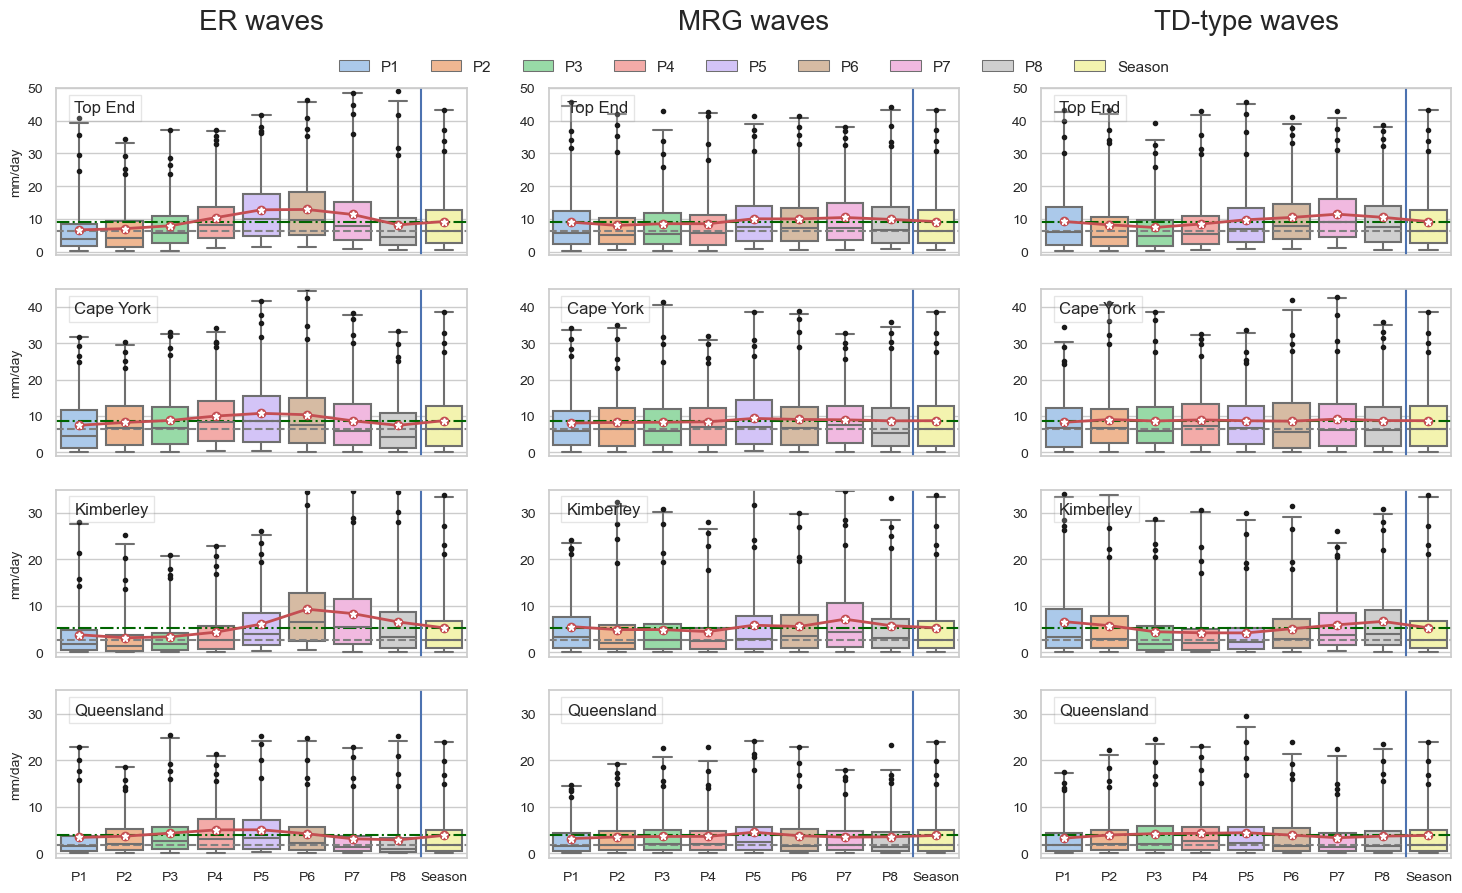

In [121]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(4,3, figsize=(18, 10))

#ER
g1_e = sns.boxplot(data=df_er_TE_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[0,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_TE,
            palette = 'pastel',
#            scale = "log"
           )

g2_e = sns.boxplot(data=df_er_CY_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[1,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_CY,
            palette = 'pastel'
#            scale = "log"
           )

g3_e = sns.boxplot(data=df_er_KY_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[2,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_KY,
            palette = 'pastel'
#            scale = "log"
           )

g4_e = sns.boxplot(data=df_er_QL_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[3,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_QL,
            palette = 'pastel'
#            scale = "log"
           )

#MRG
g1_mrg= sns.boxplot(data=df_mrg_TE_plot, y='mm/day',x='Phase', 
                    hue="Phase",
                    showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[0,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_TE,
            palette = 'pastel',
#            scale = "log"
           )

g2_mrg= sns.boxplot(data=df_mrg_CY_plot, y='mm/day',x='Phase', 
#                     hue="Phase",
                    showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[1,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_CY,
            palette = 'pastel'
#            scale = "log"
           )

g3_mrg= sns.boxplot(data=df_mrg_KY_plot, y='mm/day',x='Phase', 
#                     hue="Phase",
                    showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[2,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_KY,
            palette = 'pastel'
#            scale = "log"
           )

g4_mrg= sns.boxplot(data=df_mrg_QL_plot, y='mm/day',x='Phase', 
#                     hue="Phase",
                    showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[3,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_QL,
            palette = 'pastel'
#            scale = "log"
           )

#TD

g1_td= sns.boxplot(data=df_td_TE_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[0,2],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_TE,
            palette = 'pastel',
#            scale = "log"
           )

g2_td= sns.boxplot(data=df_td_CY_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[1,2],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_CY,
            palette = 'pastel'
#            scale = "log"
           )

g3_td= sns.boxplot(data=df_td_KY_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[2,2],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_KY,
            palette = 'pastel'
#            scale = "log"
           )

g4_td= sns.boxplot(data=df_td_QL_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[3,2],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_QL,
            palette = 'pastel'
#            scale = "log"
           )


med_TE = prec_TE_seas["precip"].median()
med_CY = prec_CY_seas["precip"].median()
med_KY = prec_KY_seas["precip"].median()
med_QL = prec_QL_seas["precip"].median()

mean_TE = prec_TE_seas["precip"].mean()
mean_CY = prec_CY_seas["precip"].mean()
mean_KY = prec_KY_seas["precip"].mean()
mean_QL = prec_QL_seas["precip"].mean()


maxval = [50,45,35,35]
for i in np.arange(0,3):
#     print(i)
    ax[0,i].axhline(med_TE, 0,1, color="grey",linestyle = '--')
    ax[1,i].axhline(med_CY, 0,1, color="grey",linestyle = '--')
    ax[2,i].axhline(med_KY, 0,1, color="grey",linestyle = '--')
    ax[3,i].axhline(med_QL, 0,1, color="grey",linestyle = '--')
    
    ax[0,i].axhline(mean_TE, 0,1, color="darkgreen",linestyle = '-.')
    ax[1,i].axhline(mean_CY, 0,1, color="darkgreen",linestyle = '-.')
    ax[2,i].axhline(mean_KY, 0,1, color="darkgreen",linestyle = '-.')
    ax[3,i].axhline(mean_QL, 0,1, color="darkgreen",linestyle = '-.')
    
    ax[0,i].tick_params(labelsize=10)
    ax[1,i].tick_params(labelsize=10)
    ax[2,i].tick_params(labelsize=10)
    ax[3,i].tick_params(labelsize=10)
    
    ax[0,i].set(xlabel= None)
    ax[1,i].set(xlabel= None)
    ax[2,i].set(xlabel= None)
    ax[3,i].set(xlabel= None)
    
    ax[0,i].set_ylabel("mm/day",fontsize=10)
    ax[1,i].set_ylabel("mm/day",fontsize=10)
    ax[2,i].set_ylabel("mm/day",fontsize=10)
    ax[3,i].set_ylabel("mm/day",fontsize=10)
    
    ax[0,i].set_ylim(-1,maxval[0])
    ax[1,i].set_ylim(-1,maxval[1])
    ax[2,i].set_ylim(-1,maxval[2])
    ax[3,i].set_ylim(-1,maxval[3])
    
#     ax[0,i].set_xlabel("mm/day",fontsize=10)
    
# for i in np.arange(0,4):
#     ax[i,0].set_title("ER",fontsize=20)
#     ax[i,0].set_title("MRG",fontsize=20)
#     ax[i,0].set_title("TD",fontsize=20)
#     ax[i,0].set_title("Top End",fontsize=20)
    

# ax[0,0].axhline(med_TE, 0,1, color="grey",linestyle = '--')
# ax[0,1].axhline(med_CY, 0,1, color="grey",linestyle = '--')
# ax[1,0].axhline(med_KY, 0,1, color="grey",linestyle = '--')
# ax[1,1].axhline(med_QL, 0,1, color="grey",linestyle = '--')

# ax[0,0].tick_params(labelsize=10)
# ax[0,1].tick_params(labelsize=10)
# ax[1,0].tick_params(labelsize=10)
# ax[1,1].tick_params(labelsize=10)

# ax[0,0].set(xlabel= None)
# ax[0,1].set(xlabel= None)
# ax[1,0].set(xlabel= None)
# ax[1,1].set(xlabel= None)

# ax[0,0].scatter(np.arange(0,9), ext_TE, c='k',marker="o")
# ax[0,1].scatter(np.arange(0,9), ext_CY, c='k',marker="o")
# ax[1,0].scatter(np.arange(0,9), ext_KY, c='k',marker="o")
# ax[1,1].scatter(np.arange(0,9), ext_QL, c='k',marker="o")

# ax[0,0].set_ylabel("mm/day",fontsize=10)
# ax[0,1].set_ylabel("mm/day",fontsize=10)
# ax[1,0].set_ylabel("mm/day",fontsize=10)
# ax[1,1].set_ylabel("mm/day",fontsize=10)

ax[0,0].set_title("ER waves",fontsize=20,y=1.3)
ax[0,1].set_title("MRG waves",fontsize=20,y=1.3)
ax[0,2].set_title("TD-type waves",fontsize=20,y=1.3)
# ax[1,1].set_title("Queensland",fontsize=20)


sns.move_legend(
    ax[0,1], "lower center",
    bbox_to_anchor=(.5, 1.), ncol=9, title=None, frameon=False,
)

for i in np.arange(0,3):
    ax[i,0].set_xticks([])
    ax[i,1].set_xticks([])
    ax[i,2].set_xticks([])
    
for i in np.arange(1,3):
    ax[0,i].set_ylabel("")
    ax[1,i].set_ylabel("")
    ax[2,i].set_ylabel("")
    ax[3,i].set_ylabel("")

for i in np.arange(0,3):
    ax[0,i].axvline(7.5,)
    ax[1,i].axvline(7.5,)
    ax[2,i].axvline(7.5,)
    ax[3,i].axvline(7.5,)

mean_TE_er = df_er_TE_plot.groupby(["Phase"]).mean()
mean_CY_er = df_er_CY_plot.groupby(["Phase"]).mean()
mean_KY_er = df_er_KY_plot.groupby(["Phase"]).mean()
mean_QL_er = df_er_QL_plot.groupby(["Phase"]).mean()


mean_TE_mrg = df_mrg_TE_plot.groupby(["Phase"]).mean()
mean_CY_mrg = df_mrg_CY_plot.groupby(["Phase"]).mean()
mean_KY_mrg = df_mrg_KY_plot.groupby(["Phase"]).mean()
mean_QL_mrg = df_mrg_QL_plot.groupby(["Phase"]).mean()


mean_TE_td = df_td_TE_plot.groupby(["Phase"]).mean()
mean_CY_td = df_td_CY_plot.groupby(["Phase"]).mean()
mean_KY_td = df_td_KY_plot.groupby(["Phase"]).mean()
mean_QL_td = df_td_QL_plot.groupby(["Phase"]).mean()

#mean
ax[0,0].plot(mean_TE_er,'r-o',linewidth=2)
ax[0,1].plot(mean_TE_mrg,'r-o',linewidth=2)
ax[0,2].plot(mean_TE_td,'r-o',linewidth=2)

ax[1,0].plot(mean_CY_er,'r-o',linewidth=2)
ax[1,1].plot(mean_CY_mrg,'r-o',linewidth=2)
ax[1,2].plot(mean_CY_td,'r-o',linewidth=2)

ax[2,0].plot(mean_KY_er,'r-o',linewidth=2)
ax[2,1].plot(mean_KY_mrg,'r-o',linewidth=2)
ax[2,2].plot(mean_KY_td,'r-o',linewidth=2)

ax[3,0].plot(mean_QL_er,'r-o',linewidth=2)
ax[3,1].plot(mean_QL_mrg,'r-o',linewidth=2)
ax[3,2].plot(mean_QL_td,'r-o',linewidth=2)

#99th
ax[0,0].plot(ext_TE_er,'k-o',linewidth=0,markersize=3)
ax[0,1].plot(ext_TE_mrg,'k-o',linewidth=0,markersize=3)
ax[0,2].plot(ext_TE_td,'k-o',linewidth=0,markersize=3)

ax[1,0].plot(ext_CY_er,'k-o',linewidth=0,markersize=3)
ax[1,1].plot(ext_CY_mrg,'k-o',linewidth=0,markersize=3)
ax[1,2].plot(ext_CY_td,'k-o',linewidth=0,markersize=3)

ax[2,0].plot(ext_KY_er,'k-o',linewidth=0,markersize=3)
ax[2,1].plot(ext_KY_mrg,'k-o',linewidth=0,markersize=3)
ax[2,2].plot(ext_KY_td,'k-o',linewidth=0,markersize=3)

ax[3,0].plot(ext_QL_er,'k-o',linewidth=0,markersize=3)
ax[3,1].plot(ext_QL_mrg,'k-o',linewidth=0,markersize=3)
ax[3,2].plot(ext_QL_td,'k-o',linewidth=0,markersize=3)


#98th
ax[0,0].plot(ext_TE_er_98,'k-o',linewidth=0,markersize=3)
ax[0,1].plot(ext_TE_mrg_98,'k-o',linewidth=0,markersize=3)
ax[0,2].plot(ext_TE_td_98,'k-o',linewidth=0,markersize=3)

ax[1,0].plot(ext_CY_er_98,'k-o',linewidth=0,markersize=3)
ax[1,1].plot(ext_CY_mrg_98,'k-o',linewidth=0,markersize=3)
ax[1,2].plot(ext_CY_td_98,'k-o',linewidth=0,markersize=3)

ax[2,0].plot(ext_KY_er_98,'k-o',linewidth=0,markersize=3)
ax[2,1].plot(ext_KY_mrg_98,'k-o',linewidth=0,markersize=3)
ax[2,2].plot(ext_KY_td_98,'k-o',linewidth=0,markersize=3)

ax[3,0].plot(ext_QL_er_98,'k-o',linewidth=0,markersize=3)
ax[3,1].plot(ext_QL_mrg_98,'k-o',linewidth=0,markersize=3)
ax[3,2].plot(ext_QL_td_98,'k-o',linewidth=0,markersize=3)


#97th
ax[0,0].plot(ext_TE_er_97,'k-o',linewidth=0,markersize=3)
ax[0,1].plot(ext_TE_mrg_97,'k-o',linewidth=0,markersize=3)
ax[0,2].plot(ext_TE_td_97,'k-o',linewidth=0,markersize=3)

ax[1,0].plot(ext_CY_er_97,'k-o',linewidth=0,markersize=3)
ax[1,1].plot(ext_CY_mrg_97,'k-o',linewidth=0,markersize=3)
ax[1,2].plot(ext_CY_td_97,'k-o',linewidth=0,markersize=3)

ax[2,0].plot(ext_KY_er_97,'k-o',linewidth=0,markersize=3)
ax[2,1].plot(ext_KY_mrg_97,'k-o',linewidth=0,markersize=3)
ax[2,2].plot(ext_KY_td_97,'k-o',linewidth=0,markersize=3)

ax[3,0].plot(ext_QL_er_97,'k-o',linewidth=0,markersize=3)
ax[3,1].plot(ext_QL_mrg_97,'k-o',linewidth=0,markersize=3)
ax[3,2].plot(ext_QL_td_97,'k-o',linewidth=0,markersize=3)


#96th
ax[0,0].plot(ext_TE_er_96,'k-o',linewidth=0,markersize=3)
ax[0,1].plot(ext_TE_mrg_96,'k-o',linewidth=0,markersize=3)
ax[0,2].plot(ext_TE_td_96,'k-o',linewidth=0,markersize=3)

ax[1,0].plot(ext_CY_er_96,'k-o',linewidth=0,markersize=3)
ax[1,1].plot(ext_CY_mrg_96,'k-o',linewidth=0,markersize=3)
ax[1,2].plot(ext_CY_td_96,'k-o',linewidth=0,markersize=3)

ax[2,0].plot(ext_KY_er_96,'k-o',linewidth=0,markersize=3)
ax[2,1].plot(ext_KY_mrg_96,'k-o',linewidth=0,markersize=3)
ax[2,2].plot(ext_KY_td_96,'k-o',linewidth=0,markersize=3)

ax[3,0].plot(ext_QL_er_96,'k-o',linewidth=0,markersize=3)
ax[3,1].plot(ext_QL_mrg_96,'k-o',linewidth=0,markersize=3)
ax[3,2].plot(ext_QL_td_96,'k-o',linewidth=0,markersize=3)

for i in np.arange(0,4):
    ax[i,0].text(-0.1, maxval[i]*0.85, regions[i]).set_bbox(dict(facecolor='white', alpha=0.2, edgecolor='gray'))
    ax[i,1].text(-0.1, maxval[i]*0.85, regions[i]).set_bbox(dict(facecolor='white', alpha=0.2, edgecolor='gray'))
    ax[i,2].text(-0.1, maxval[i]*0.85, regions[i]).set_bbox(dict(facecolor='white', alpha=0.2, edgecolor='gray'))
#     ax[i,3].text(0, maxval[i]-5, regions[i]).set_bbox(dict(facecolor='cyan', alpha=0.2, edgecolor='cyan'))

# sns.color_palette("pastel")

plt.savefig(diro+'boxplots_precip.png')
plt.savefig(diro+'boxplots_precip.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


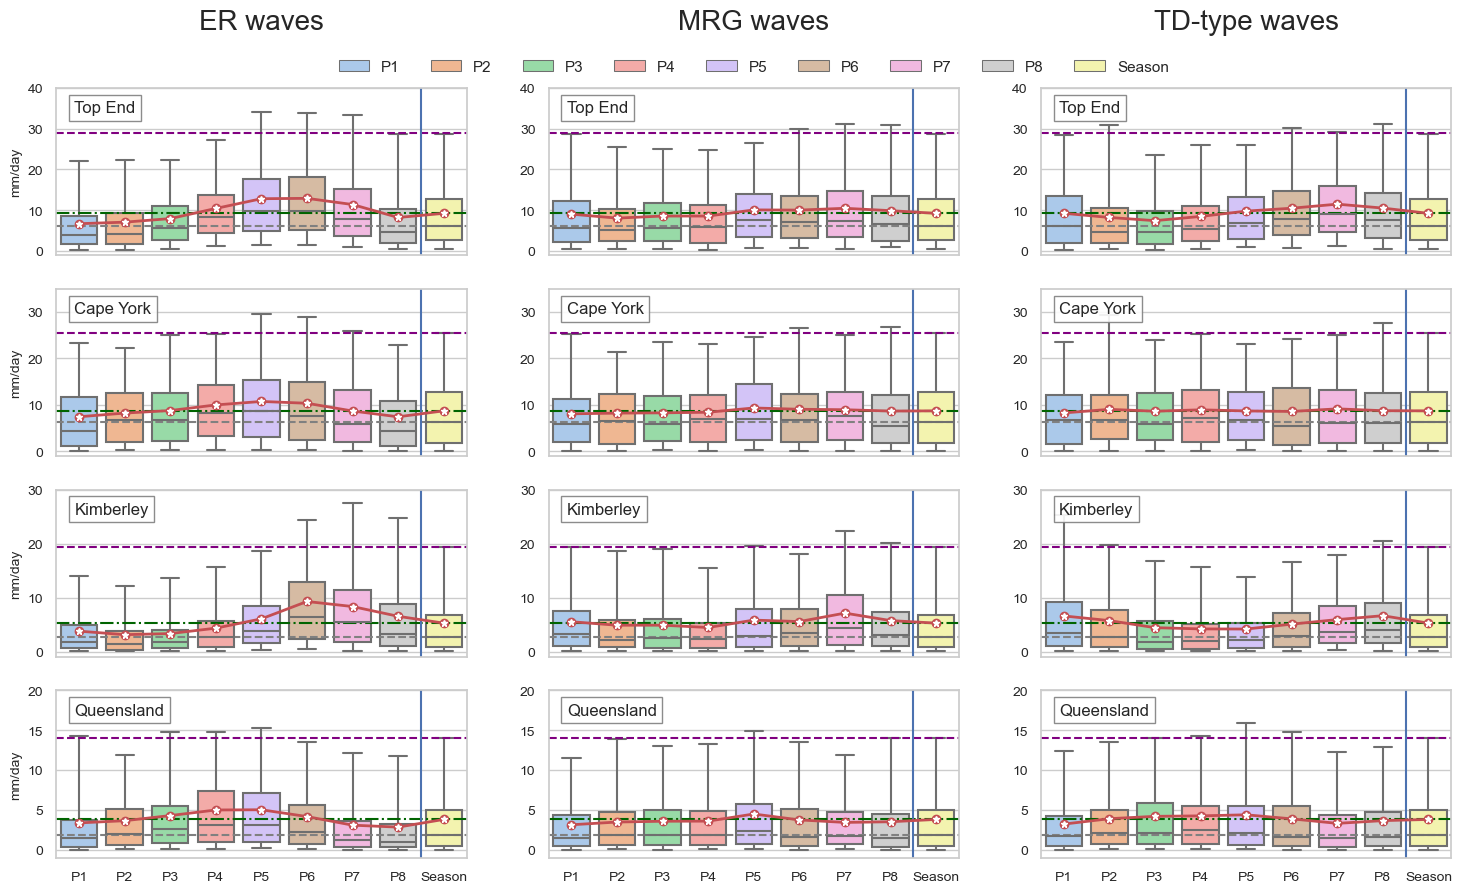

In [127]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(4,3, figsize=(18, 10))

#ER
g1_e = sns.boxplot(data=df_er_TE_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[0,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_TE,
            palette = 'pastel',
#            scale = "log"
           )

g2_e = sns.boxplot(data=df_er_CY_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[1,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_CY,
            palette = 'pastel'
#            scale = "log"
           )

g3_e = sns.boxplot(data=df_er_KY_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[2,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_KY,
            palette = 'pastel'
#            scale = "log"
           )

g4_e = sns.boxplot(data=df_er_QL_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[3,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_QL,
            palette = 'pastel'
#            scale = "log"
           )

#MRG
g1_mrg= sns.boxplot(data=df_mrg_TE_plot, y='mm/day',x='Phase', 
                    hue="Phase",
                    showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[0,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_TE,
            palette = 'pastel',
#            scale = "log"
           )

g2_mrg= sns.boxplot(data=df_mrg_CY_plot, y='mm/day',x='Phase', 
#                     hue="Phase",
                    showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[1,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_CY,
            palette = 'pastel'
#            scale = "log"
           )

g3_mrg= sns.boxplot(data=df_mrg_KY_plot, y='mm/day',x='Phase', 
#                     hue="Phase",
                    showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[2,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_KY,
            palette = 'pastel'
#            scale = "log"
           )

g4_mrg= sns.boxplot(data=df_mrg_QL_plot, y='mm/day',x='Phase', 
#                     hue="Phase",
                    showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[3,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_QL,
            palette = 'pastel'
#            scale = "log"
           )

#TD

g1_td= sns.boxplot(data=df_td_TE_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[0,2],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_TE,
            palette = 'pastel',
#            scale = "log"
           )

g2_td= sns.boxplot(data=df_td_CY_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[1,2],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_CY,
            palette = 'pastel'
#            scale = "log"
           )

g3_td= sns.boxplot(data=df_td_KY_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[2,2],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_KY,
            palette = 'pastel'
#            scale = "log"
           )

g4_td= sns.boxplot(data=df_td_QL_plot, y='mm/day',x='Phase', 
#                    hue="Phase",
                   showfliers = False, showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"},
            ax = ax[3,2],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            whis = whishi_QL,
            palette = 'pastel'
#            scale = "log"
           )


med_TE = prec_TE_seas["precip"].median()
med_CY = prec_CY_seas["precip"].median()
med_KY = prec_KY_seas["precip"].median()
med_QL = prec_QL_seas["precip"].median()

mean_TE = prec_TE_seas["precip"].mean()
mean_CY = prec_CY_seas["precip"].mean()
mean_KY = prec_KY_seas["precip"].mean()
mean_QL = prec_QL_seas["precip"].mean()


maxval = [40,35,30,20]
for i in np.arange(0,3):
#     print(i)
    ax[0,i].axhline(med_TE, 0,1, color="grey",linestyle = '--')
    ax[1,i].axhline(med_CY, 0,1, color="grey",linestyle = '--')
    ax[2,i].axhline(med_KY, 0,1, color="grey",linestyle = '--')
    ax[3,i].axhline(med_QL, 0,1, color="grey",linestyle = '--')
    
    ax[0,i].axhline(mean_TE, 0,1, color="darkgreen",linestyle = '-.')
    ax[1,i].axhline(mean_CY, 0,1, color="darkgreen",linestyle = '-.')
    ax[2,i].axhline(mean_KY, 0,1, color="darkgreen",linestyle = '-.')
    ax[3,i].axhline(mean_QL, 0,1, color="darkgreen",linestyle = '-.')
    
    ax[0,i].axhline(ext_TE_er_95["mm/day"]["Season"],color="purple",linestyle = '--')
    ax[1,i].axhline(ext_CY_er_95["mm/day"]["Season"],color="purple",linestyle = '--')
    ax[2,i].axhline(ext_KY_er_95["mm/day"]["Season"],color="purple",linestyle = '--')
    ax[3,i].axhline(ext_QL_er_95["mm/day"]["Season"],color="purple",linestyle = '--')
    
    ax[0,i].tick_params(labelsize=10)
    ax[1,i].tick_params(labelsize=10)
    ax[2,i].tick_params(labelsize=10)
    ax[3,i].tick_params(labelsize=10)
    
    ax[0,i].set(xlabel= None)
    ax[1,i].set(xlabel= None)
    ax[2,i].set(xlabel= None)
    ax[3,i].set(xlabel= None)
    
    ax[0,i].set_ylabel("mm/day",fontsize=10)
    ax[1,i].set_ylabel("mm/day",fontsize=10)
    ax[2,i].set_ylabel("mm/day",fontsize=10)
    ax[3,i].set_ylabel("mm/day",fontsize=10)
    
    ax[0,i].set_ylim(-1,maxval[0])
    ax[1,i].set_ylim(-1,maxval[1])
    ax[2,i].set_ylim(-1,maxval[2])
    ax[3,i].set_ylim(-1,maxval[3])
    
#     ax[0,i].set_xlabel("mm/day",fontsize=10)
    
# for i in np.arange(0,4):
#     ax[i,0].set_title("ER",fontsize=20)
#     ax[i,0].set_title("MRG",fontsize=20)
#     ax[i,0].set_title("TD",fontsize=20)
#     ax[i,0].set_title("Top End",fontsize=20)
    

# ax[0,0].axhline(med_TE, 0,1, color="grey",linestyle = '--')
# ax[0,1].axhline(med_CY, 0,1, color="grey",linestyle = '--')
# ax[1,0].axhline(med_KY, 0,1, color="grey",linestyle = '--')
# ax[1,1].axhline(med_QL, 0,1, color="grey",linestyle = '--')

# ax[0,0].tick_params(labelsize=10)
# ax[0,1].tick_params(labelsize=10)
# ax[1,0].tick_params(labelsize=10)
# ax[1,1].tick_params(labelsize=10)

# ax[0,0].set(xlabel= None)
# ax[0,1].set(xlabel= None)
# ax[1,0].set(xlabel= None)
# ax[1,1].set(xlabel= None)

# ax[0,0].scatter(np.arange(0,9), ext_TE, c='k',marker="o")
# ax[0,1].scatter(np.arange(0,9), ext_CY, c='k',marker="o")
# ax[1,0].scatter(np.arange(0,9), ext_KY, c='k',marker="o")
# ax[1,1].scatter(np.arange(0,9), ext_QL, c='k',marker="o")

# ax[0,0].set_ylabel("mm/day",fontsize=10)
# ax[0,1].set_ylabel("mm/day",fontsize=10)
# ax[1,0].set_ylabel("mm/day",fontsize=10)
# ax[1,1].set_ylabel("mm/day",fontsize=10)

ax[0,0].set_title("ER waves",fontsize=20,y=1.3)
ax[0,1].set_title("MRG waves",fontsize=20,y=1.3)
ax[0,2].set_title("TD-type waves",fontsize=20,y=1.3)
# ax[1,1].set_title("Queensland",fontsize=20)


sns.move_legend(
    ax[0,1], "lower center",
    bbox_to_anchor=(.5, 1.), ncol=9, title=None, frameon=False,
)

for i in np.arange(0,3):
    ax[i,0].set_xticks([])
    ax[i,1].set_xticks([])
    ax[i,2].set_xticks([])
    
for i in np.arange(1,3):
    ax[0,i].set_ylabel("")
    ax[1,i].set_ylabel("")
    ax[2,i].set_ylabel("")
    ax[3,i].set_ylabel("")

for i in np.arange(0,3):
    ax[0,i].axvline(7.5,)
    ax[1,i].axvline(7.5,)
    ax[2,i].axvline(7.5,)
    ax[3,i].axvline(7.5,)

mean_TE_er = df_er_TE_plot.groupby(["Phase"]).mean()
mean_CY_er = df_er_CY_plot.groupby(["Phase"]).mean()
mean_KY_er = df_er_KY_plot.groupby(["Phase"]).mean()
mean_QL_er = df_er_QL_plot.groupby(["Phase"]).mean()


mean_TE_mrg = df_mrg_TE_plot.groupby(["Phase"]).mean()
mean_CY_mrg = df_mrg_CY_plot.groupby(["Phase"]).mean()
mean_KY_mrg = df_mrg_KY_plot.groupby(["Phase"]).mean()
mean_QL_mrg = df_mrg_QL_plot.groupby(["Phase"]).mean()


mean_TE_td = df_td_TE_plot.groupby(["Phase"]).mean()
mean_CY_td = df_td_CY_plot.groupby(["Phase"]).mean()
mean_KY_td = df_td_KY_plot.groupby(["Phase"]).mean()
mean_QL_td = df_td_QL_plot.groupby(["Phase"]).mean()

#mean
ax[0,0].plot(mean_TE_er,'r-o',linewidth=2)
ax[0,1].plot(mean_TE_mrg,'r-o',linewidth=2)
ax[0,2].plot(mean_TE_td,'r-o',linewidth=2)

ax[1,0].plot(mean_CY_er,'r-o',linewidth=2)
ax[1,1].plot(mean_CY_mrg,'r-o',linewidth=2)
ax[1,2].plot(mean_CY_td,'r-o',linewidth=2)

ax[2,0].plot(mean_KY_er,'r-o',linewidth=2)
ax[2,1].plot(mean_KY_mrg,'r-o',linewidth=2)
ax[2,2].plot(mean_KY_td,'r-o',linewidth=2)

ax[3,0].plot(mean_QL_er,'r-o',linewidth=2)
ax[3,1].plot(mean_QL_mrg,'r-o',linewidth=2)
ax[3,2].plot(mean_QL_td,'r-o',linewidth=2)

#99th
# ax[0,0].axhline(ext_TE_er["mm/day"]["Season"])
# ax[0,1].plot(ext_TE_mrg,'k-o',linewidth=0,markersize=3)
# ax[0,2].plot(ext_TE_td,'k-o',linewidth=0,markersize=3)

# ax[1,0].plot(ext_CY_er,'k-o',linewidth=0,markersize=3)
# ax[1,1].plot(ext_CY_mrg,'k-o',linewidth=0,markersize=3)
# ax[1,2].plot(ext_CY_td,'k-o',linewidth=0,markersize=3)

# ax[2,0].plot(ext_KY_er,'k-o',linewidth=0,markersize=3)
# ax[2,1].plot(ext_KY_mrg,'k-o',linewidth=0,markersize=3)
# ax[2,2].plot(ext_KY_td,'k-o',linewidth=0,markersize=3)

# ax[3,0].plot(ext_QL_er,'k-o',linewidth=0,markersize=3)
# ax[3,1].plot(ext_QL_mrg,'k-o',linewidth=0,markersize=3)
# ax[3,2].plot(ext_QL_td,'k-o',linewidth=0,markersize=3)


#98th
# ax[0,0].plot(ext_TE_er_98,'k-o',linewidth=0,markersize=3)
# ax[0,1].plot(ext_TE_mrg_98,'k-o',linewidth=0,markersize=3)
# ax[0,2].plot(ext_TE_td_98,'k-o',linewidth=0,markersize=3)

# ax[1,0].plot(ext_CY_er_98,'k-o',linewidth=0,markersize=3)
# ax[1,1].plot(ext_CY_mrg_98,'k-o',linewidth=0,markersize=3)
# ax[1,2].plot(ext_CY_td_98,'k-o',linewidth=0,markersize=3)

# ax[2,0].plot(ext_KY_er_98,'k-o',linewidth=0,markersize=3)
# ax[2,1].plot(ext_KY_mrg_98,'k-o',linewidth=0,markersize=3)
# ax[2,2].plot(ext_KY_td_98,'k-o',linewidth=0,markersize=3)

# ax[3,0].plot(ext_QL_er_98,'k-o',linewidth=0,markersize=3)
# ax[3,1].plot(ext_QL_mrg_98,'k-o',linewidth=0,markersize=3)
# ax[3,2].plot(ext_QL_td_98,'k-o',linewidth=0,markersize=3)


# #97th
# ax[0,0].plot(ext_TE_er_97,'k-o',linewidth=0,markersize=3)
# ax[0,1].plot(ext_TE_mrg_97,'k-o',linewidth=0,markersize=3)
# ax[0,2].plot(ext_TE_td_97,'k-o',linewidth=0,markersize=3)

# ax[1,0].plot(ext_CY_er_97,'k-o',linewidth=0,markersize=3)
# ax[1,1].plot(ext_CY_mrg_97,'k-o',linewidth=0,markersize=3)
# ax[1,2].plot(ext_CY_td_97,'k-o',linewidth=0,markersize=3)

# ax[2,0].plot(ext_KY_er_97,'k-o',linewidth=0,markersize=3)
# ax[2,1].plot(ext_KY_mrg_97,'k-o',linewidth=0,markersize=3)
# ax[2,2].plot(ext_KY_td_97,'k-o',linewidth=0,markersize=3)

# ax[3,0].plot(ext_QL_er_97,'k-o',linewidth=0,markersize=3)
# ax[3,1].plot(ext_QL_mrg_97,'k-o',linewidth=0,markersize=3)
# ax[3,2].plot(ext_QL_td_97,'k-o',linewidth=0,markersize=3)


# #96th
# ax[0,0].plot(ext_TE_er_96,'k-o',linewidth=0,markersize=3)
# ax[0,1].plot(ext_TE_mrg_96,'k-o',linewidth=0,markersize=3)
# ax[0,2].plot(ext_TE_td_96,'k-o',linewidth=0,markersize=3)

# ax[1,0].plot(ext_CY_er_96,'k-o',linewidth=0,markersize=3)
# ax[1,1].plot(ext_CY_mrg_96,'k-o',linewidth=0,markersize=3)
# ax[1,2].plot(ext_CY_td_96,'k-o',linewidth=0,markersize=3)

# ax[2,0].plot(ext_KY_er_96,'k-o',linewidth=0,markersize=3)
# ax[2,1].plot(ext_KY_mrg_96,'k-o',linewidth=0,markersize=3)
# ax[2,2].plot(ext_KY_td_96,'k-o',linewidth=0,markersize=3)

# ax[3,0].plot(ext_QL_er_96,'k-o',linewidth=0,markersize=3)
# ax[3,1].plot(ext_QL_mrg_96,'k-o',linewidth=0,markersize=3)
# ax[3,2].plot(ext_QL_td_96,'k-o',linewidth=0,markersize=3)

for i in np.arange(0,4):
    ax[i,0].text(-0.1, maxval[i]*0.85, regions[i]).set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    ax[i,1].text(-0.1, maxval[i]*0.85, regions[i]).set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    ax[i,2].text(-0.1, maxval[i]*0.85, regions[i]).set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='gray'))
#     ax[i,3].text(0, maxval[i]-5, regions[i]).set_bbox(dict(facecolor='cyan', alpha=0.2, edgecolor='cyan'))

# sns.color_palette("pastel")

plt.savefig(diro+'boxplots_precip.png')
plt.savefig(diro+'boxplots_precip.eps')

In [118]:

np.arange(0,4)

array([0, 1, 2, 3])

In [119]:
ext_TE_er

,mm/day
Phase,
P1,40.899680
P2,34.524010
P3,37.133550
P4,37.218802
P5,41.776629
P6,46.179751
P7,48.533380
P8,48.908057
Season,43.339202


In [90]:

# fig, ax = plt.subplots(2,2, figsize=(18, 10))

# sns.boxplot(data=df_EC_plot, x='mm/day',y='Phase', hue="Phase",
#             ax = ax[1,1],
#             flierprops={"marker": "x"},
#             notch=False, showcaps=True,
#             dodge = False,
#             fliersize = 3,
#             palette = 'Set2'
# #            scale = "log"
#            )

# sns.boxplot(data=df_CY_plot, x='mm/day',y='Phase', hue="Phase",
#             ax = ax[0,1],
#             flierprops={"marker": "x"},
#             notch=False, showcaps=True,
#             dodge = False,
#             fliersize = 3,
#             palette = 'Set2'
# #            scale = "log"
#            )

# sns.boxplot(data=df_TE_plot, x='mm/day',y='Phase', hue="Phase",
#             ax = ax[0,0],
#             flierprops={"marker": "x"},
#             notch=False, showcaps=True,
#             dodge = False,
#             fliersize = 3,
#             palette = 'Set2'
# #            scale = "log"
#            )

# sns.boxplot(data=df_KY_plot, x='mm/day',y='Phase', hue="Phase",
#             ax = ax[1,0],
#             flierprops={"marker": "x"},
#             notch=False, showcaps=True,
#             dodge = False,
#             fliersize = 3,
# #             legend = False,
#             palette = 'Set2'
# #            scale = "log"
#            )

# sns.move_legend(
#     ax[0,0], "upper left",
#     bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
# )

# sns.move_legend(
#     ax[0,1], "upper left",
#     bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
# )

# sns.move_legend(
#     ax[1,0], "upper left",
#     bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
# )

# sns.move_legend(
#     ax[1,1], "upper left",
#     bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
# )

# plot_TE = df_TE_plot[df_TE["Phase"].isin(["Season"])]
# med_TE  = plot_TE["mm/day"].median()

# plot_CY = df_CY_plot[df_CY["Phase"].isin(["Season"])]
# med_CY  = plot_CY["mm/day"].median()

# plot_KY = df_KY_plot[df_KY["Phase"].isin(["Season"])]
# med_KY  = plot_KY["mm/day"].median()

# plot_EC = df_EC_plot[df_EC["Phase"].isin(["Season"])]
# med_EC  = plot_EC["mm/day"].median()

# print(med_EC)

# ax[0,0].axvline(med_TE, 0,1, color="grey",linestyle = '--')
# ax[0,1].axvline(med_CY, 0,1, color="grey",linestyle = '--')
# ax[1,0].axvline(med_KY, 0,1, color="grey",linestyle = '--')
# ax[1,1].axvline(med_EC, 0,1, color="grey",linestyle = '--')

# ax[0,0].set_xlim(-1,30)
# ax[0,1].set_xlim(-1,30)
# ax[1,0].set_xlim(-1,30)
# ax[1,1].set_xlim(-1,30)

# # # ax[0].set_ylim(0.6,1.)
# # # ax[1].set_ylim(0.6,1.)
# # # ax[2].set_ylim(0.6,1.)

# ax[0,0].set(xlabel= None)
# ax[0,1].set(xlabel= None)
# ax[1,1].set(ylabel= None)
# ax[0,1].set(ylabel= None)

# ax[0,0].set_title("Top End")
# ax[0,1].set_title("Cape York")
# ax[1,0].set_title("Kimberley")
# ax[1,1].set_title("East Coast")

In [91]:
figname = 'boxplot_'+wave+'_'+season+'.png'
figpath = os.path.join(dirout, figname)
figpath

fig.savefig(figpath, bbox_inches='tight')

NameError: name 'wave' is not defined

In [ ]:

fig, ax = plt.subplots(2,2, figsize=(18, 10))

sns.violinplot(data=df_EC_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[1,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.violinplot(data=df_CY_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[0,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.violinplot(data=df_TE_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[0,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.violinplot(data=df_KY_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[1,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
#             legend = False,
            palette = 'Set2'
#            scale = "log"
           )

sns.move_legend(
    ax[0,0], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[0,1], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[1,0], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[1,1], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

plot_TE = df_TE_plot[df_TE["Phase"].isin(["Season"])]
med_TE  = plot_TE["mm/day"].median()

plot_CY = df_CY_plot[df_CY["Phase"].isin(["Season"])]
med_CY  = plot_CY["mm/day"].median()

plot_KY = df_KY_plot[df_KY["Phase"].isin(["Season"])]
med_KY  = plot_KY["mm/day"].median()

plot_EC = df_EC_plot[df_EC["Phase"].isin(["Season"])]
med_EC  = plot_EC["mm/day"].median()

print(med_EC)

ax[0,0].axvline(med_TE, 0,1, color="grey",linestyle = '--')
ax[0,1].axvline(med_CY, 0,1, color="grey",linestyle = '--')
ax[1,0].axvline(med_KY, 0,1, color="grey",linestyle = '--')
ax[1,1].axvline(med_EC, 0,1, color="grey",linestyle = '--')

ax[0,0].set_xlim(-1,30)
ax[0,1].set_xlim(-1,30)
ax[1,0].set_xlim(-1,30)
ax[1,1].set_xlim(-1,30)

# # ax[0].set_ylim(0.6,1.)
# # ax[1].set_ylim(0.6,1.)
# # ax[2].set_ylim(0.6,1.)

ax[0,0].set(xlabel= None)
ax[0,1].set(xlabel= None)
ax[1,1].set(ylabel= None)
ax[0,1].set(ylabel= None)

ax[0,0].set_title("Top End")
ax[0,1].set_title("Cape York")
ax[1,0].set_title("Kimberley")
ax[1,1].set_title("East Coast")